In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')

print(titanic.info())
print(titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  

# Data Cleaning

In [5]:
#Remove unnecessary columns 
df = titanic.drop(columns = ['who', 'deck', 'alive'])

# Handle NaN values
df = df.ffill()  # Forward fill for missing values

# Remove duplicates
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     833 non-null    int64   
 1   pclass       833 non-null    int64   
 2   sex          833 non-null    object  
 3   age          833 non-null    float64 
 4   sibsp        833 non-null    int64   
 5   parch        833 non-null    int64   
 6   fare         833 non-null    float64 
 7   embarked     833 non-null    object  
 8   class        833 non-null    category
 9   adult_male   833 non-null    bool    
 10  embark_town  833 non-null    object  
 11  alone        833 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 67.6+ KB


In [6]:
# Standardize categorical values
df['sex'] = df['sex'].str.lower()
df['embarked'] = df['embarked'].str.upper()

In [7]:
#Correcting outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Univariate Analysis

In [8]:
#Summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.399760,2.283313,29.724394,0.451381,0.377551,25.339257
std,0.490143,0.847180,14.709396,0.721228,0.703708,21.638752
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,15.500000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,32.320800
max,1.000000,3.000000,67.500000,2.500000,2.500000,68.914500


In [9]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

#Freq distributions for categorical data
for col in non_numeric_columns:

    print(titanic[col].value_counts())


sex
male      577
female    314
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
adult_male
True     537
False    354
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
alone
True     537
False    354
Name: count, dtype: int64


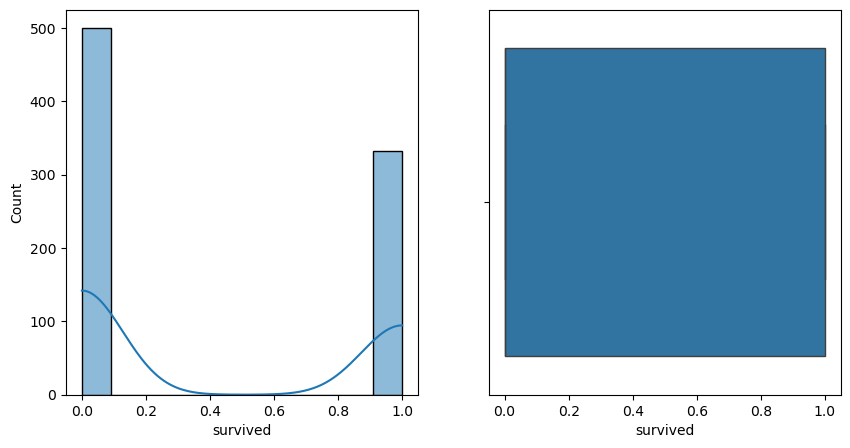

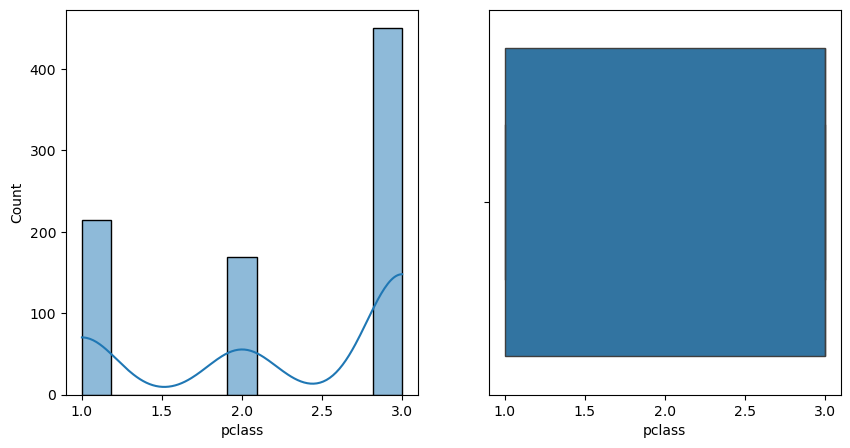

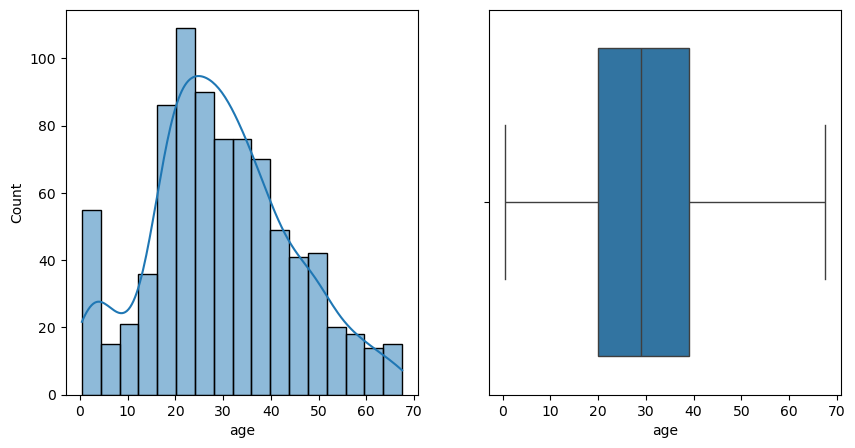

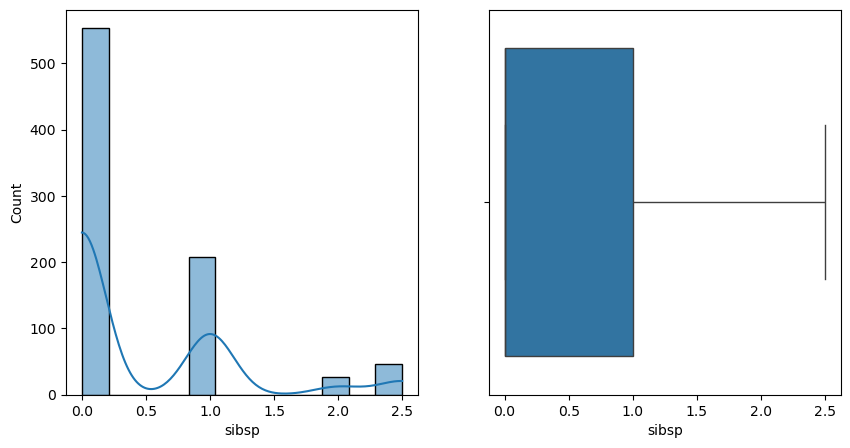

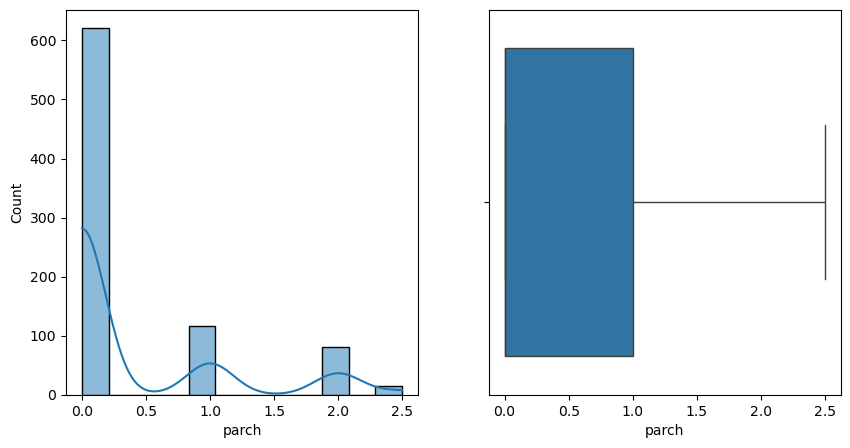

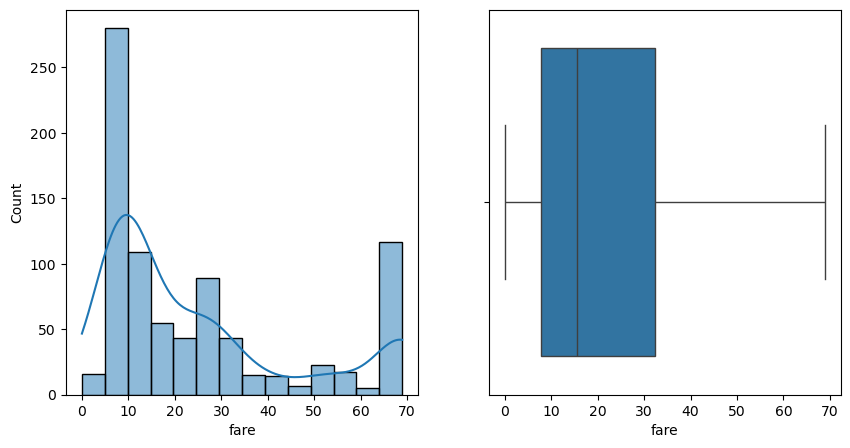

In [10]:
# Univariate plots

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)
    plt.show()

# Bivariate Analysis

In [12]:
numerical = titanic.select_dtypes(include=['float64', 'int64']).columns
print(titanic[numerical].corr())

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


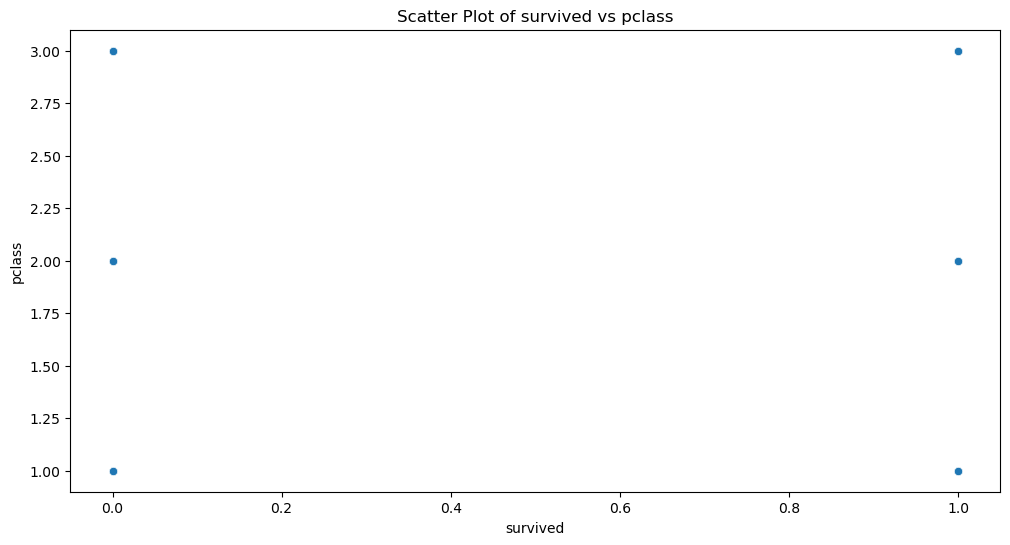

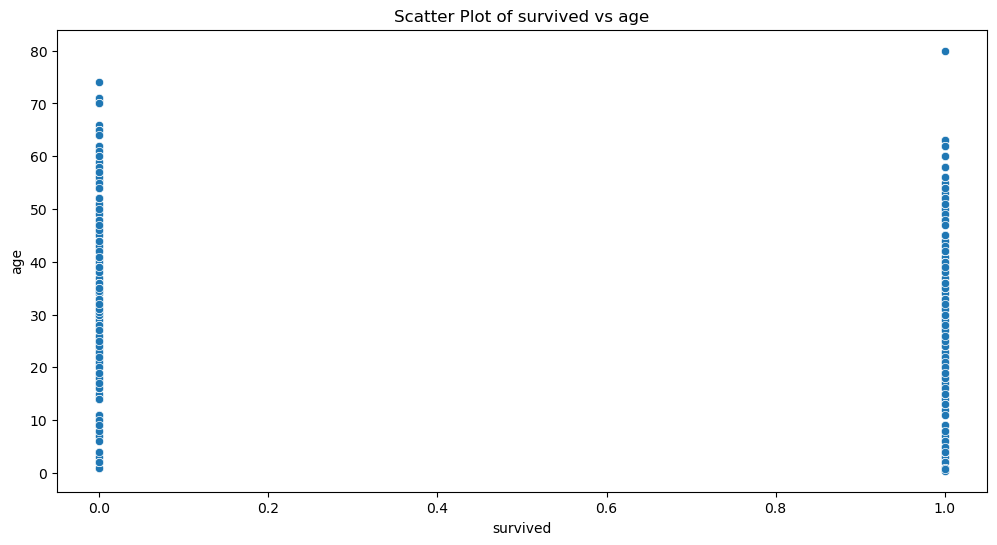

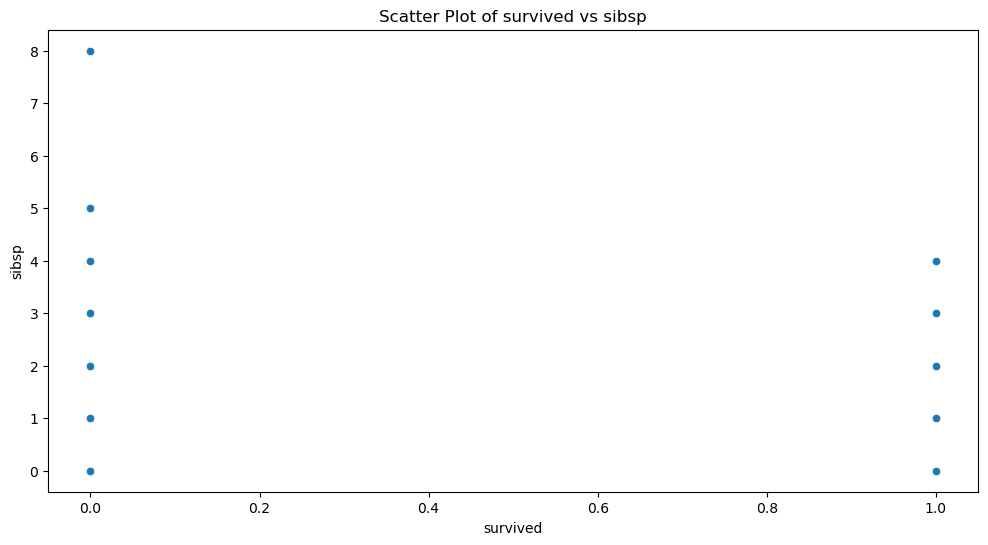

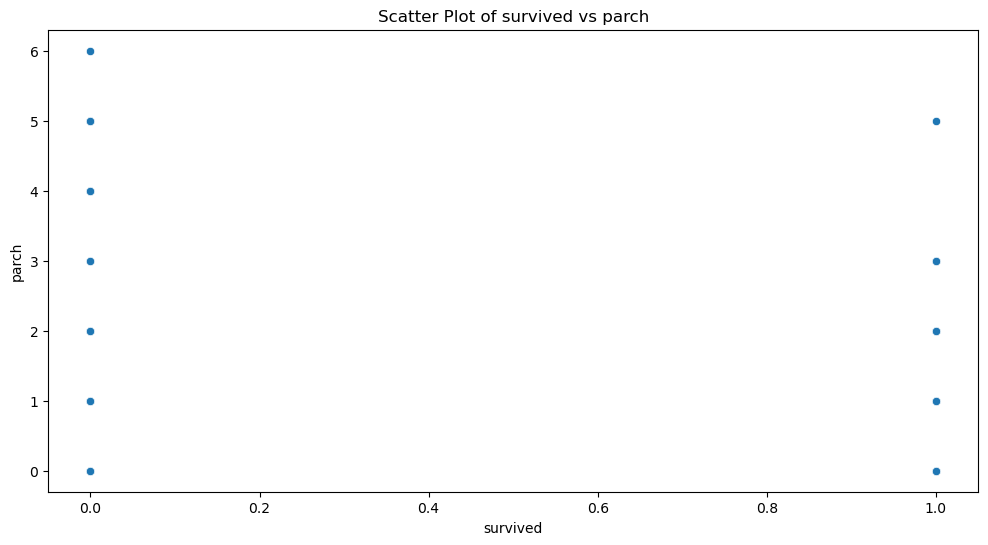

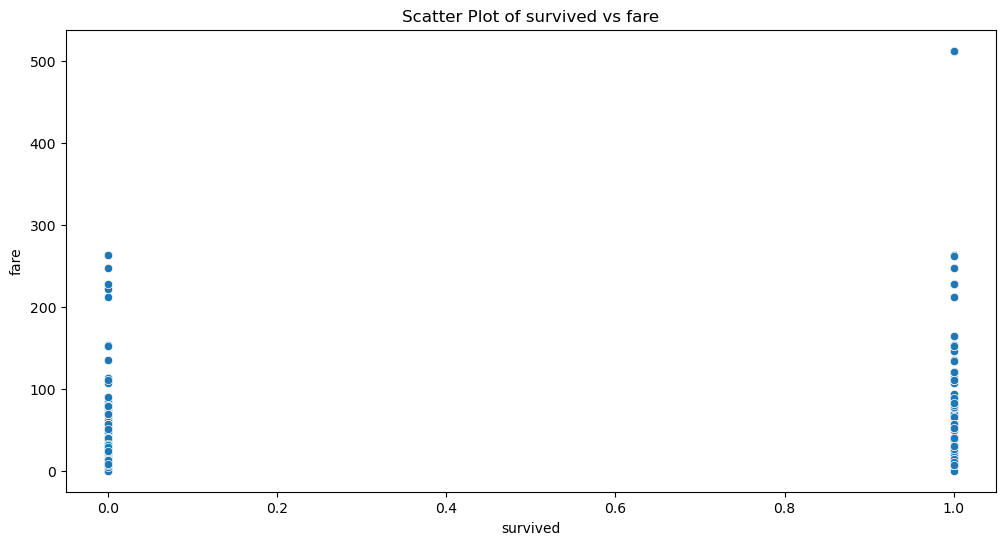

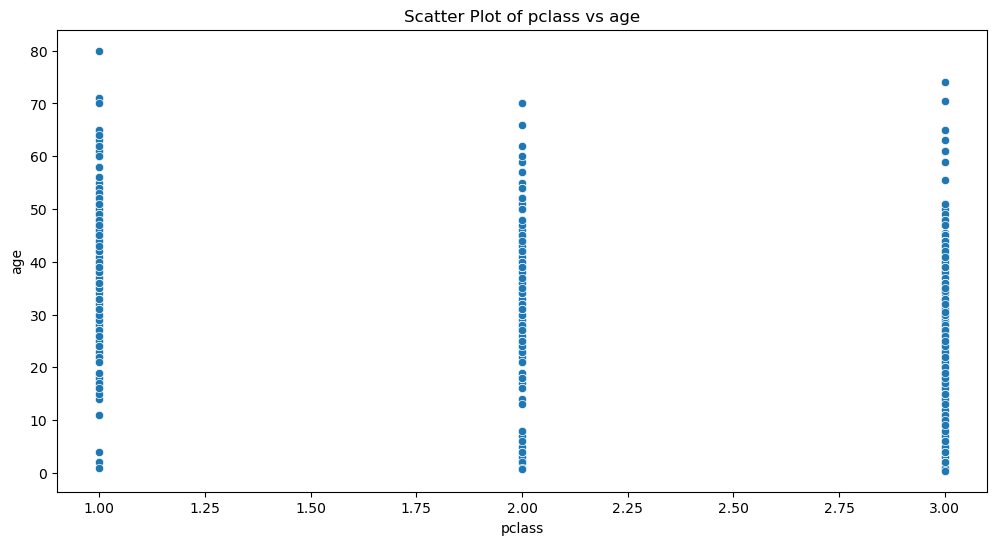

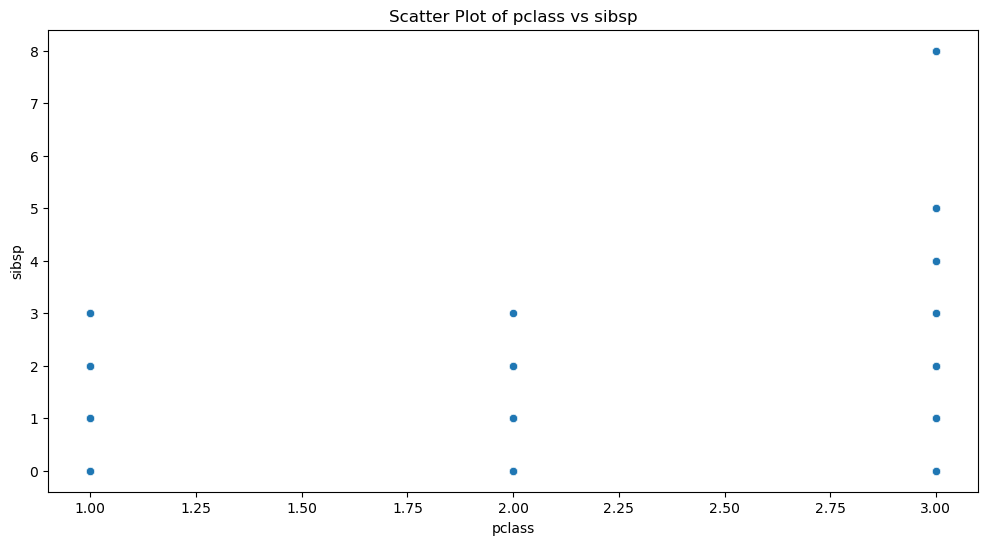

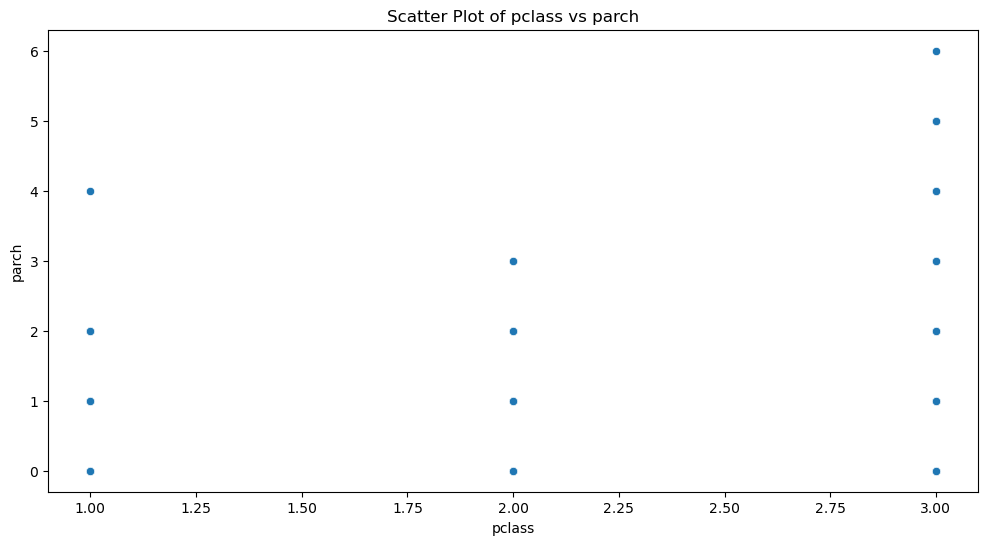

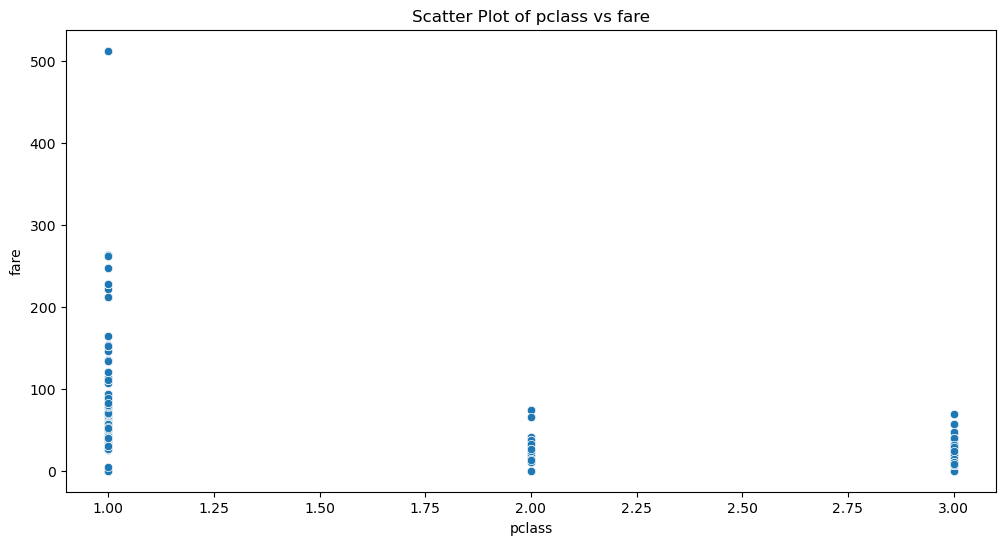

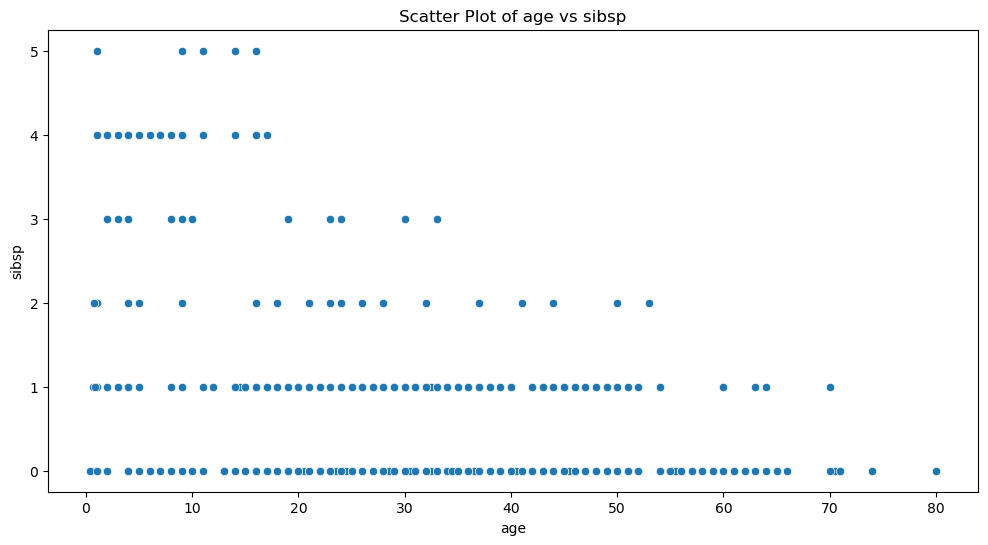

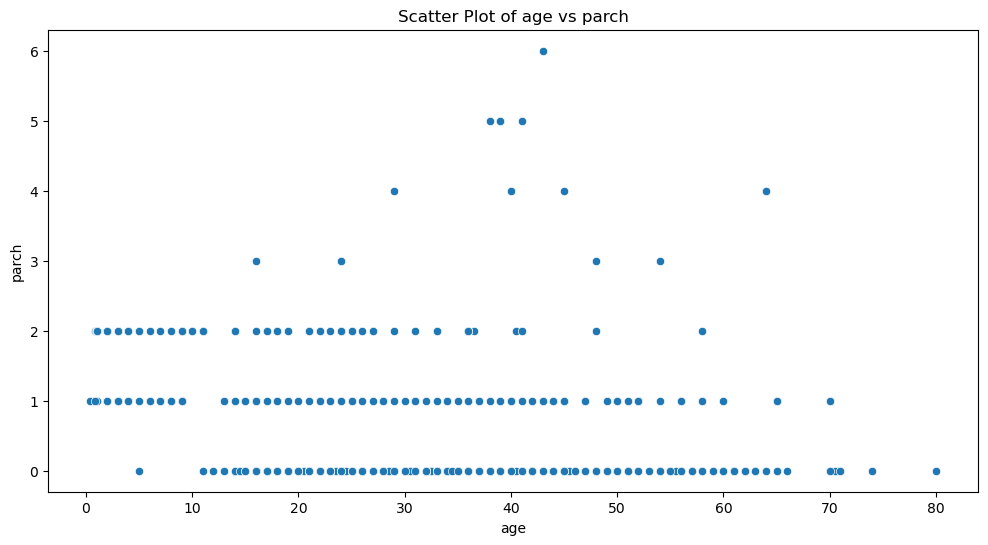

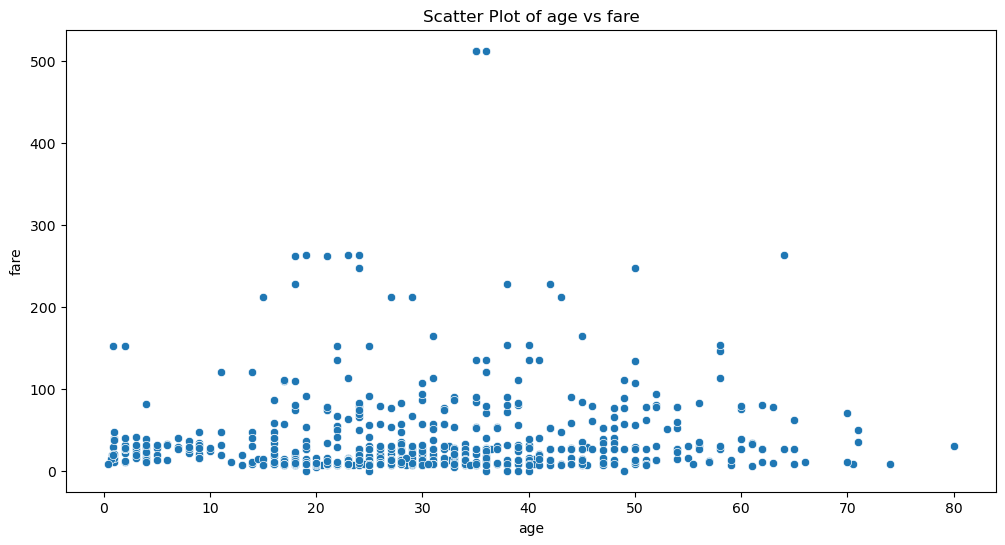

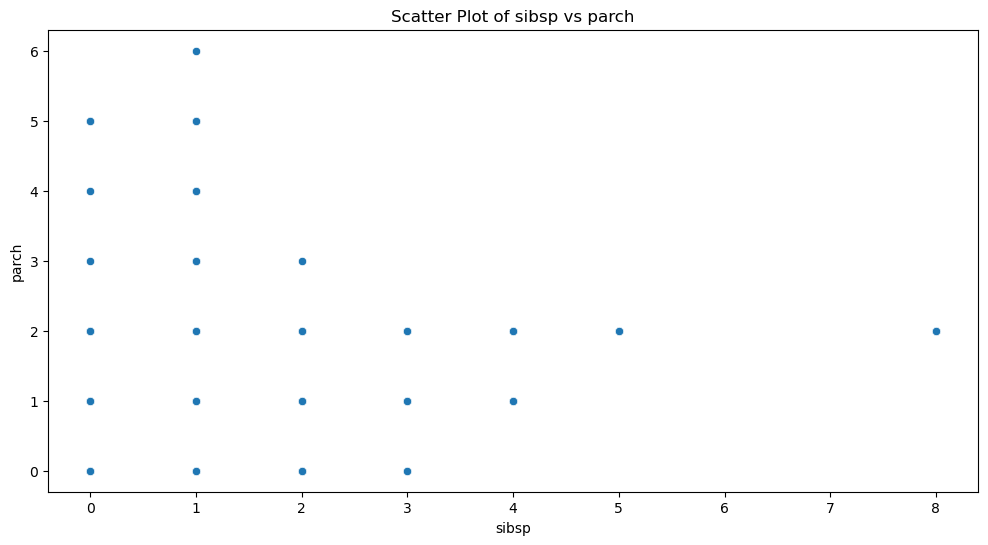

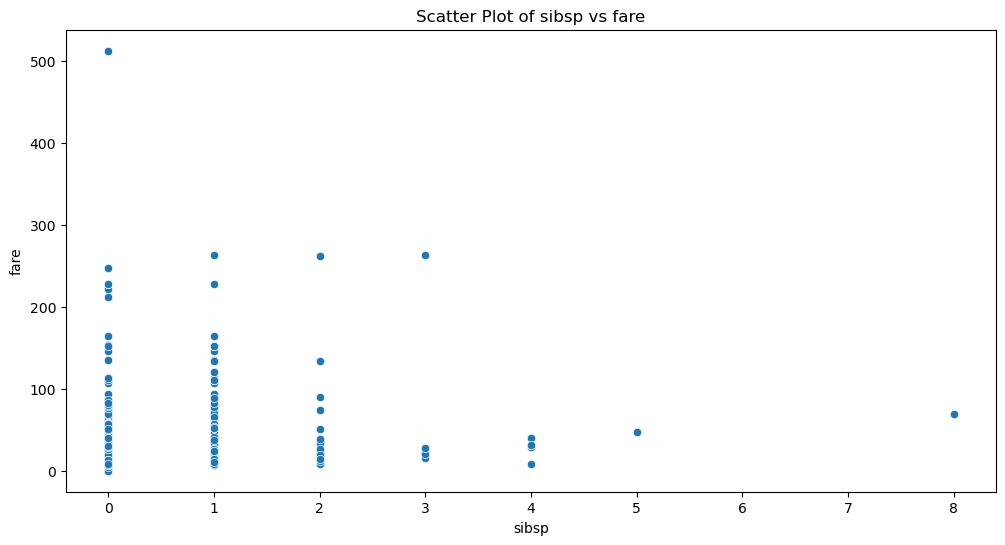

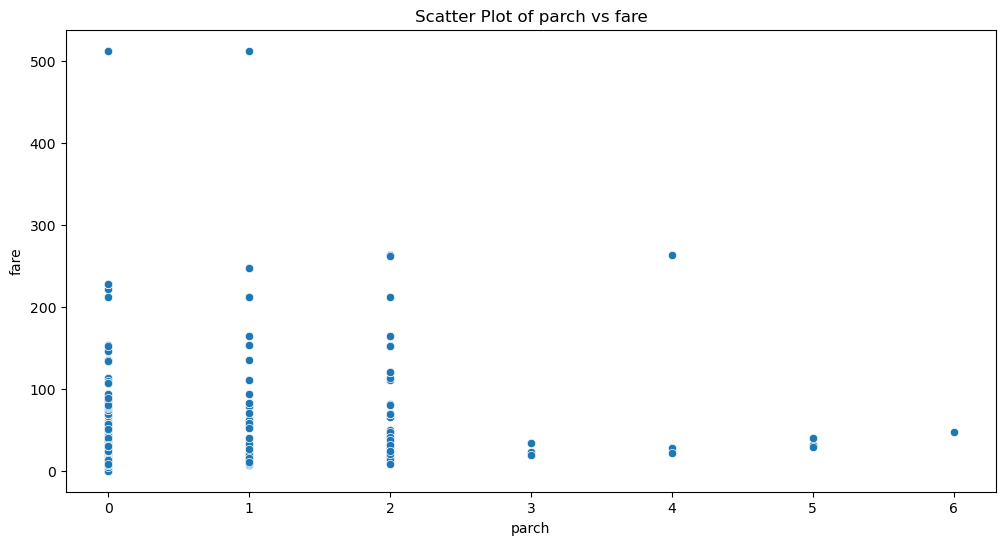

In [13]:
for i, col1 in enumerate(numerical):
        for j, col2 in enumerate(numerical):
            if i < j: 
                plt.figure(figsize=(12, 6))
                sns.scatterplot(x=titanic[col1], y=titanic[col2])
                plt.title(f'Scatter Plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()

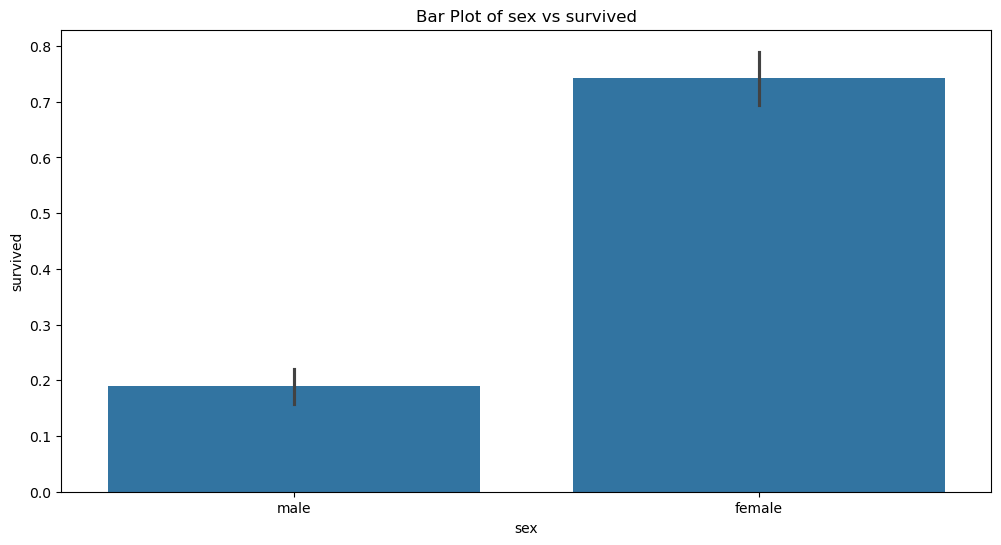

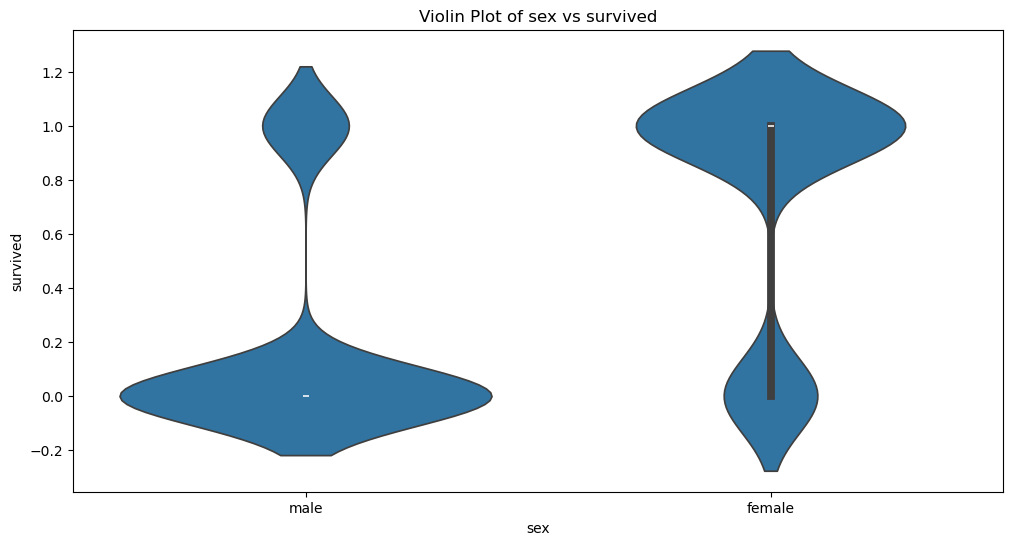

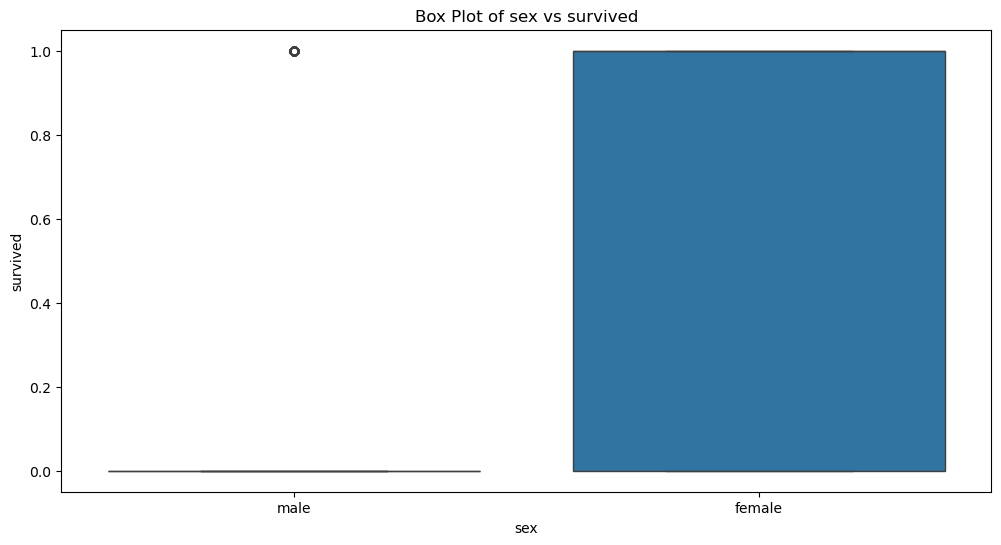

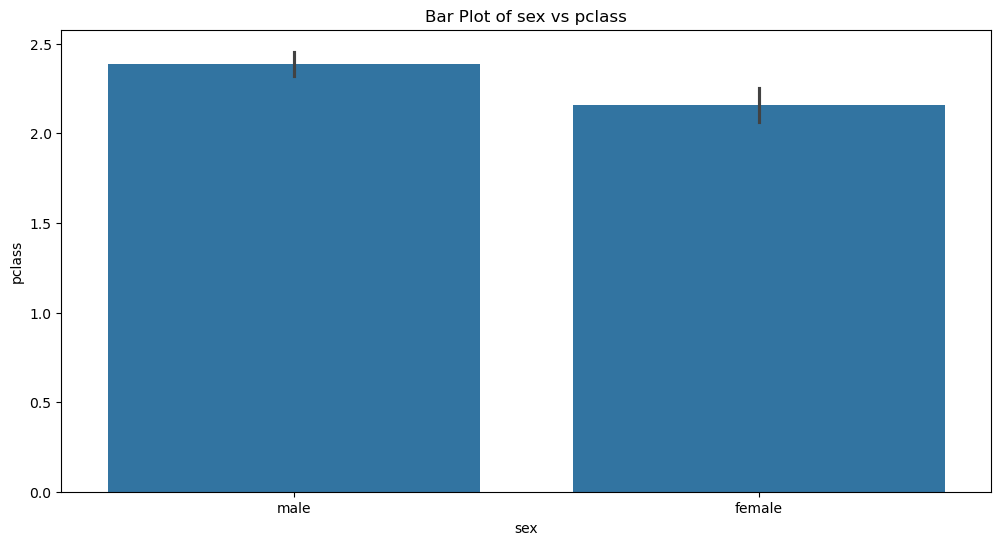

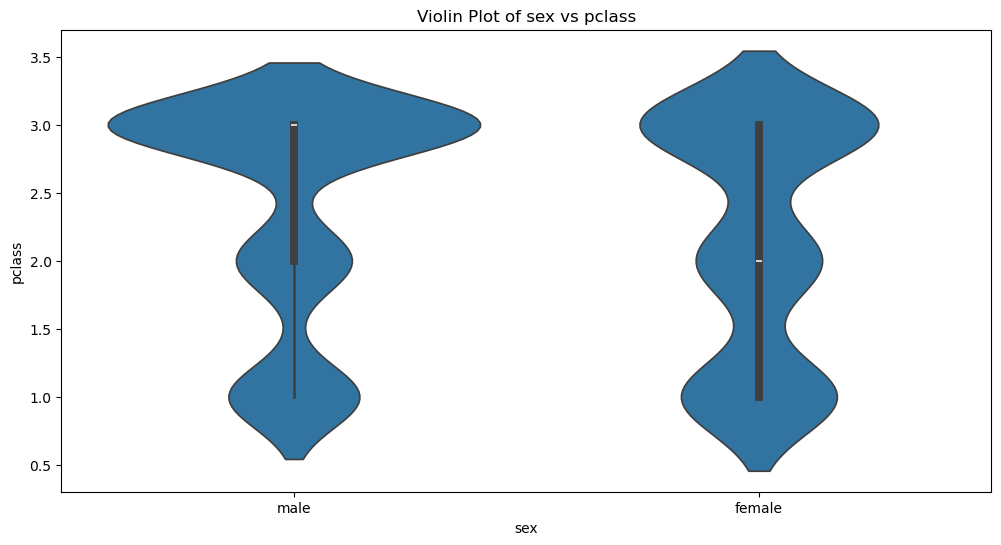

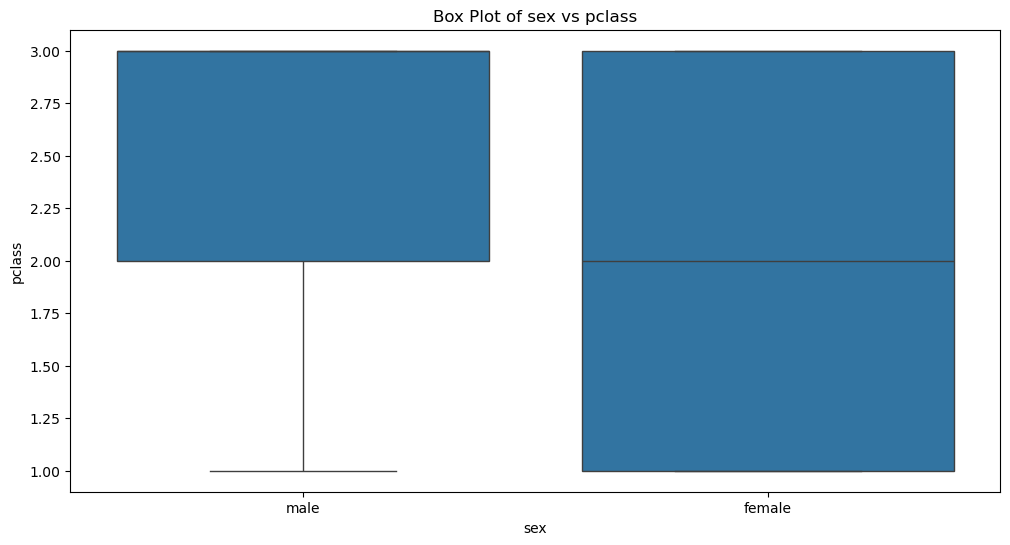

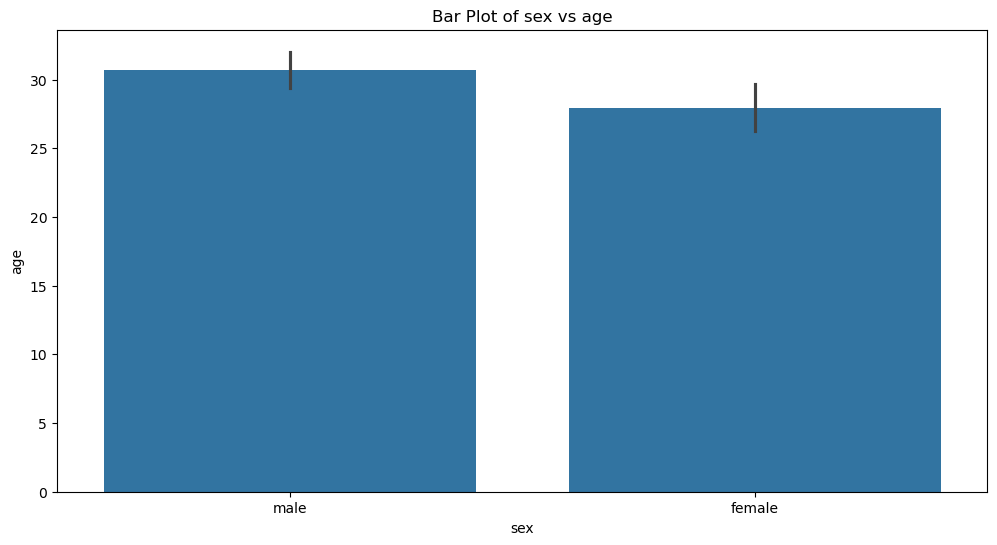

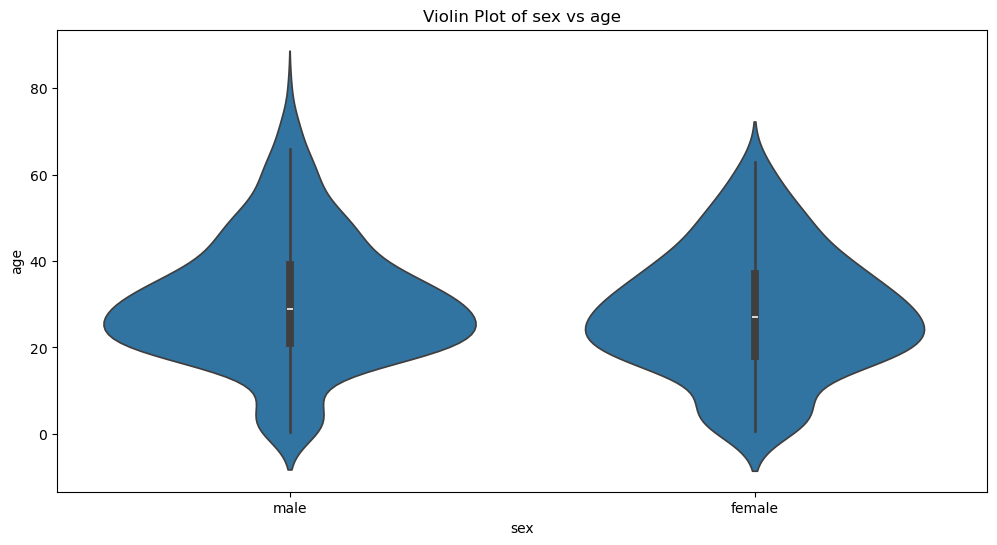

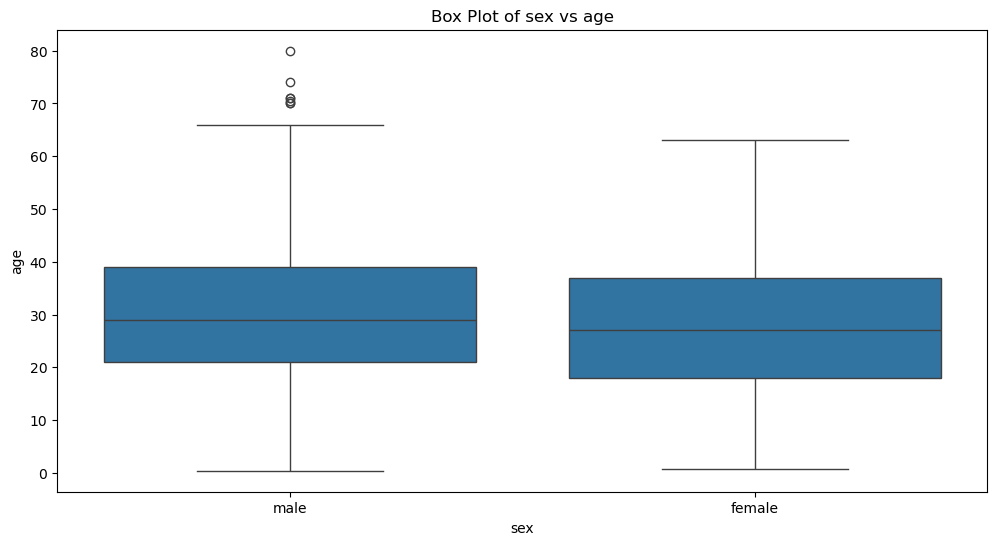

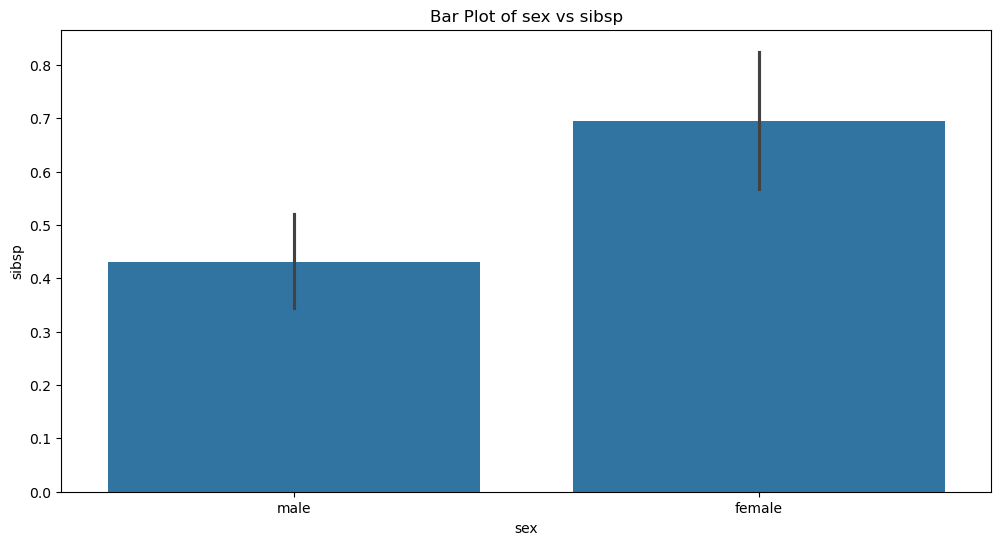

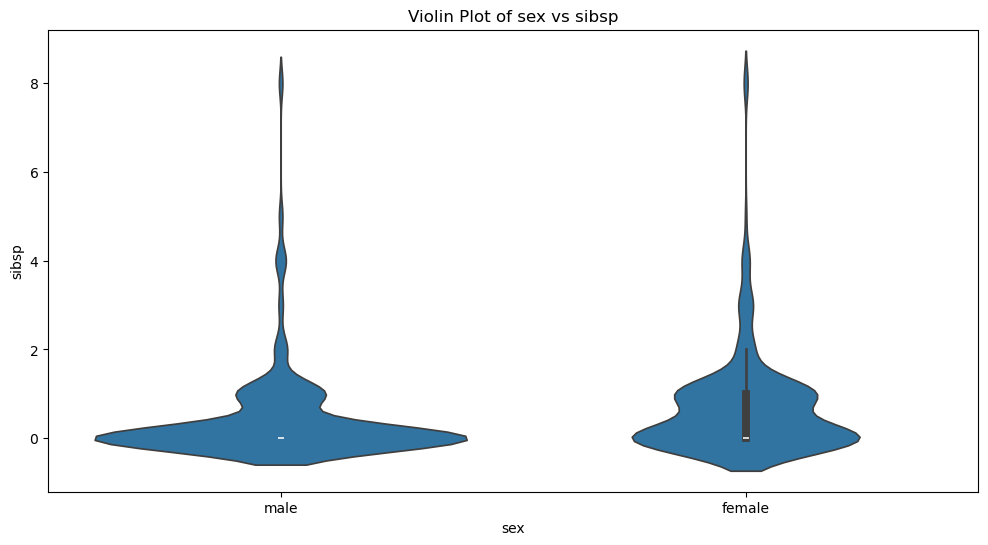

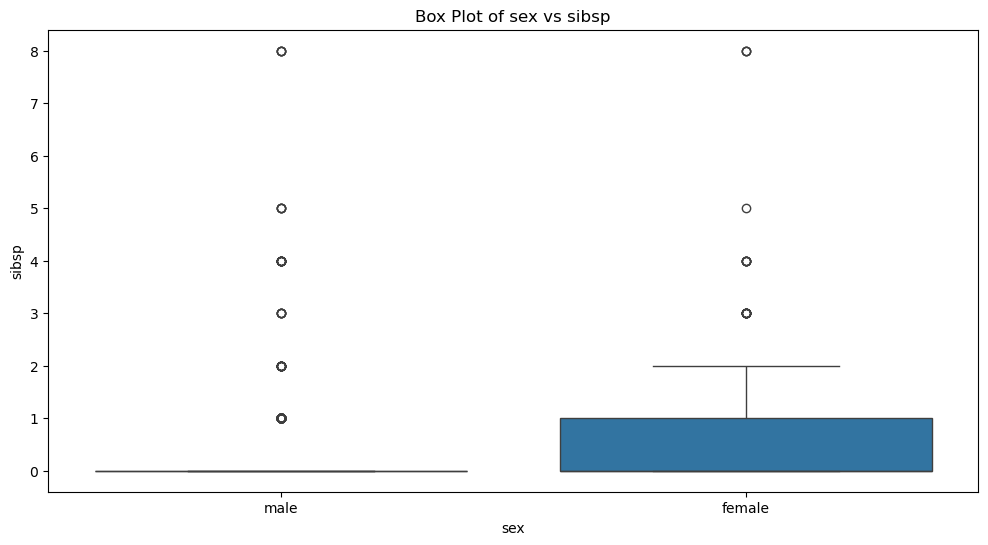

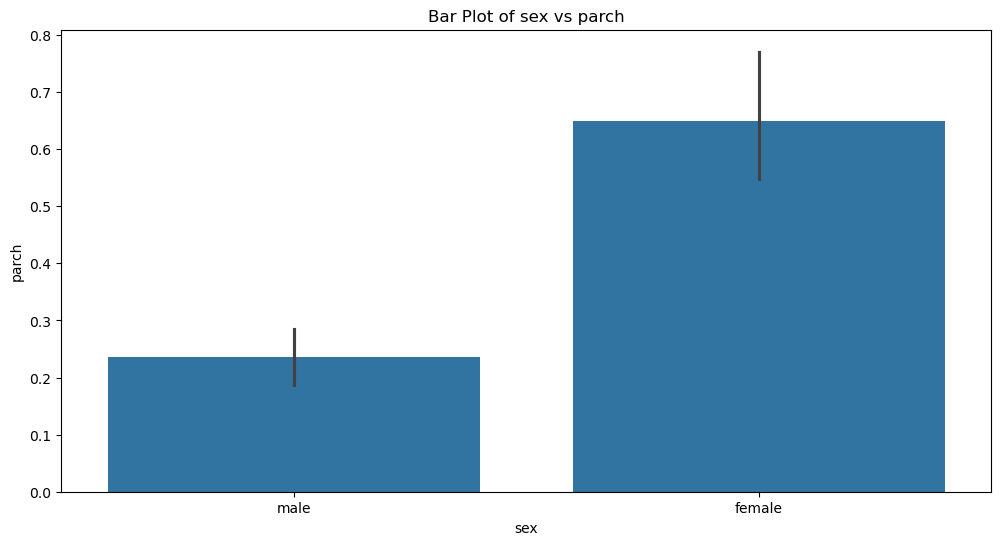

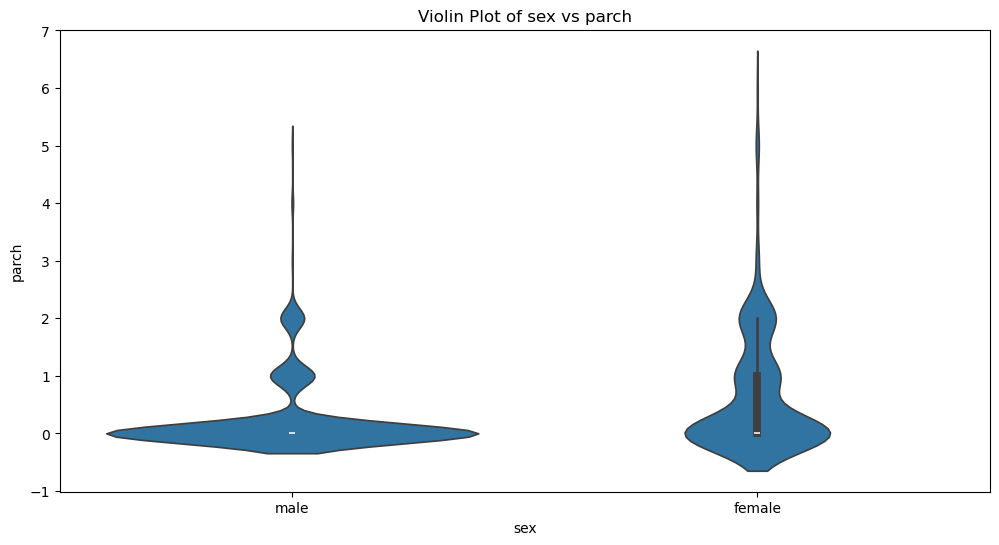

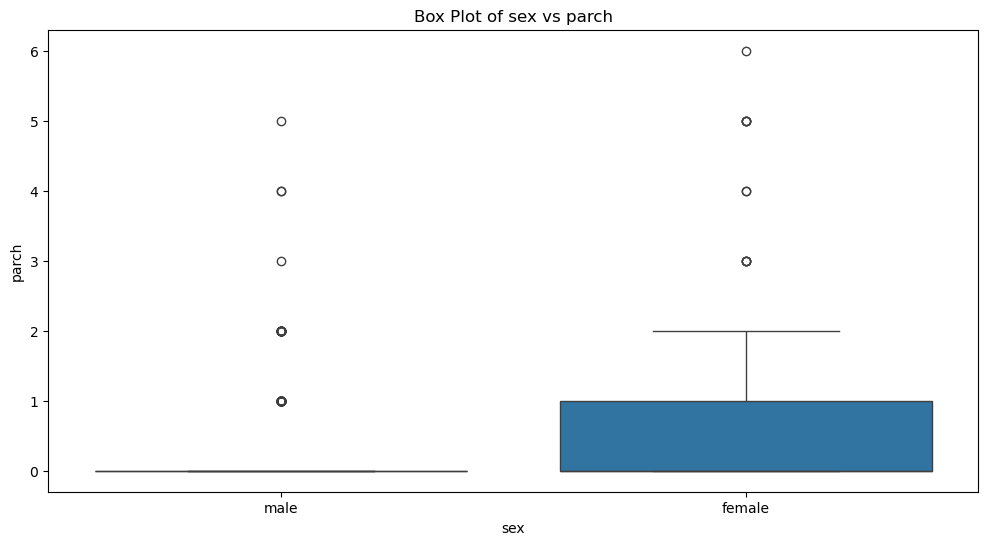

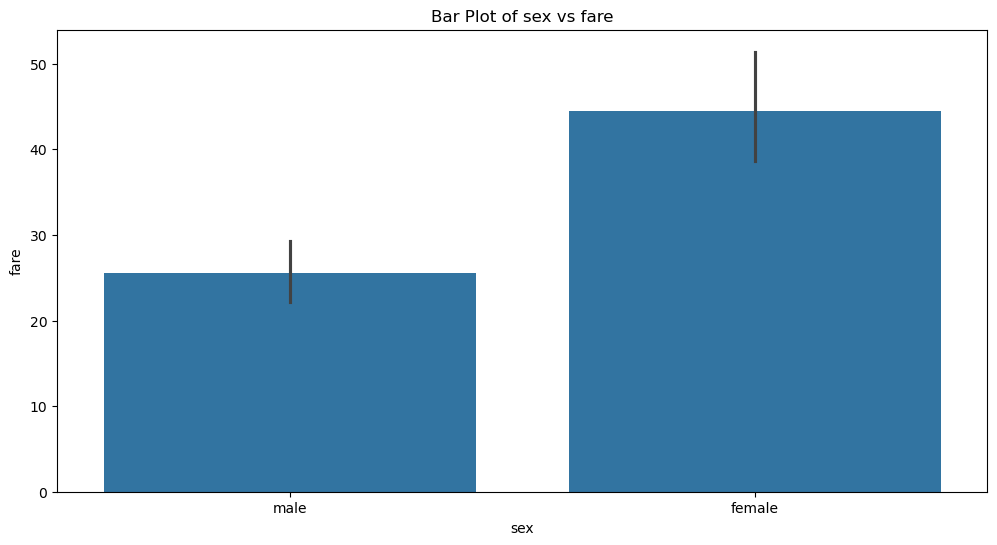

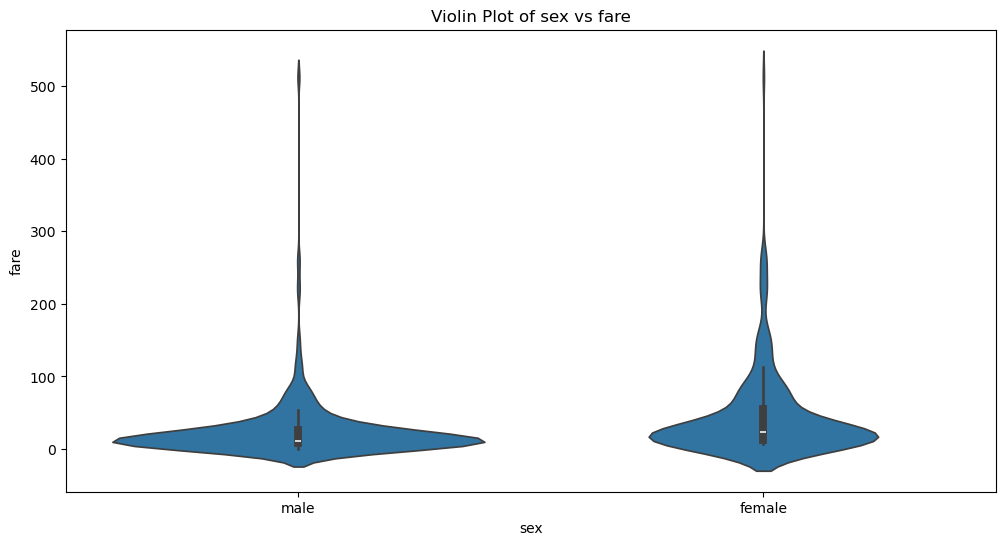

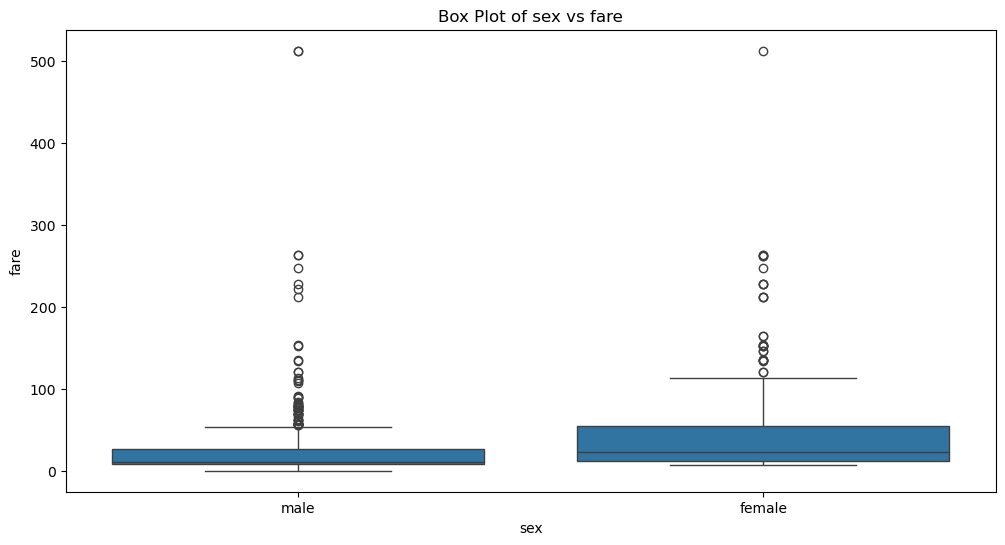

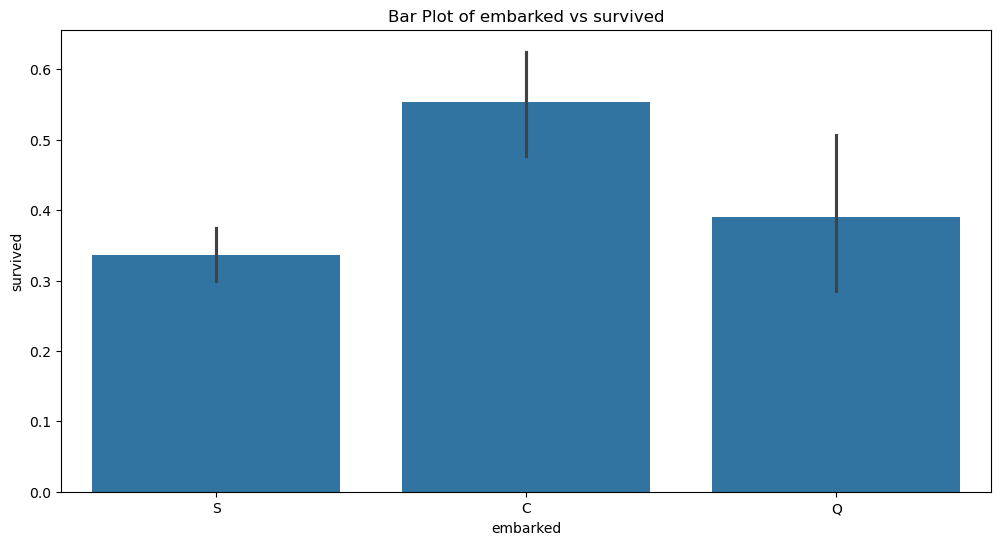

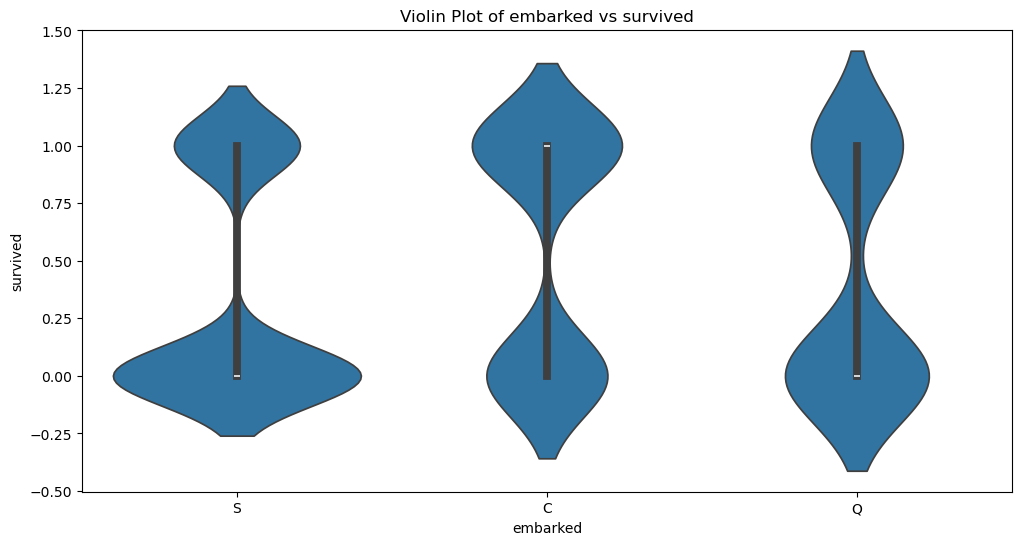

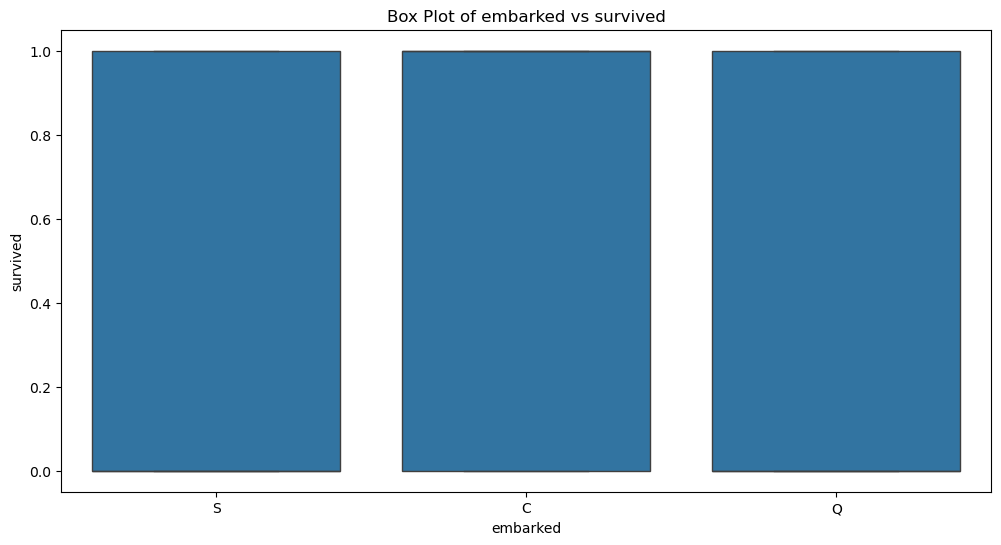

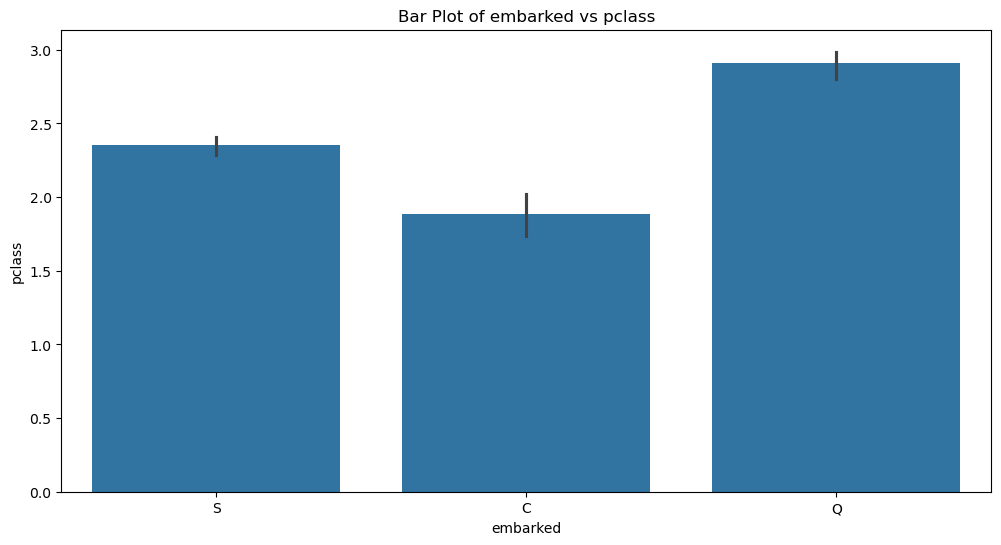

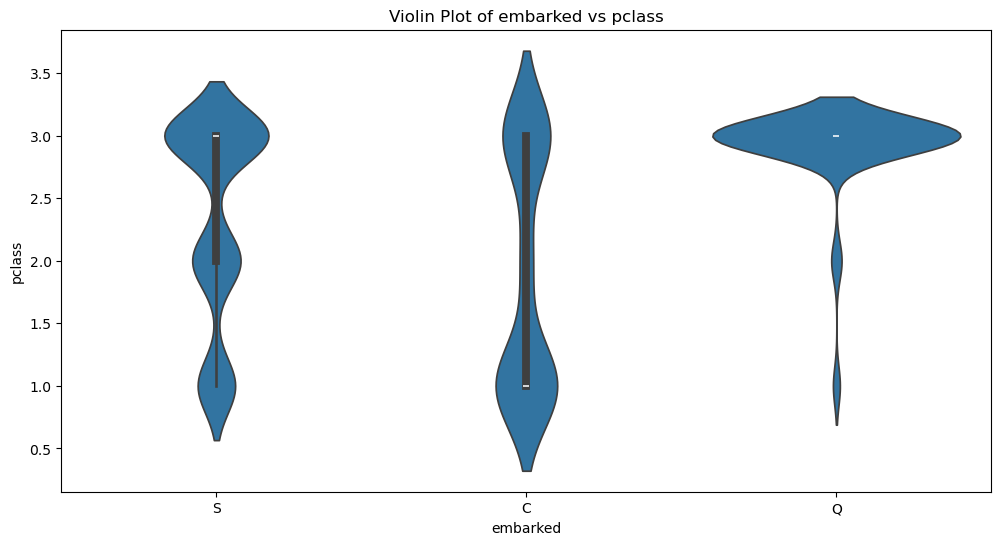

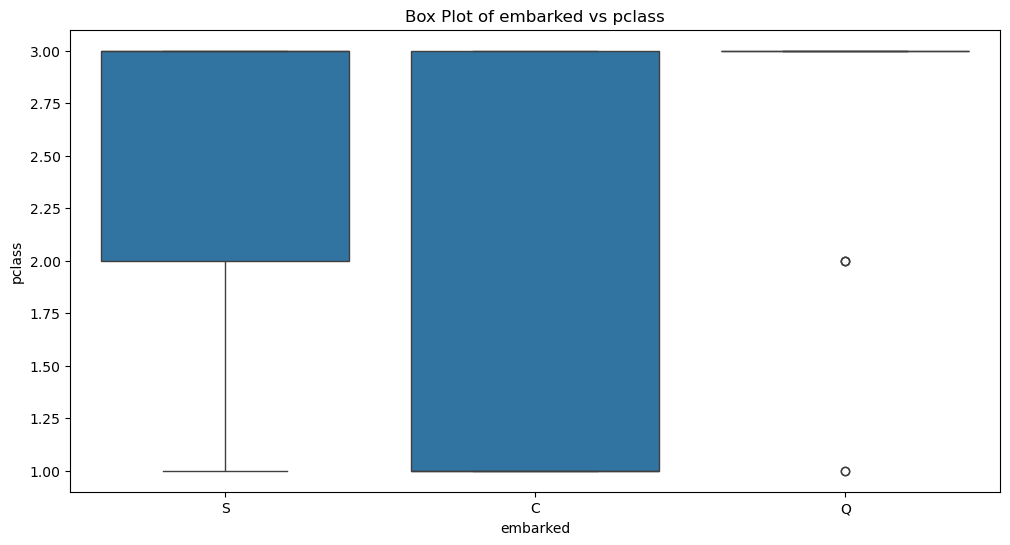

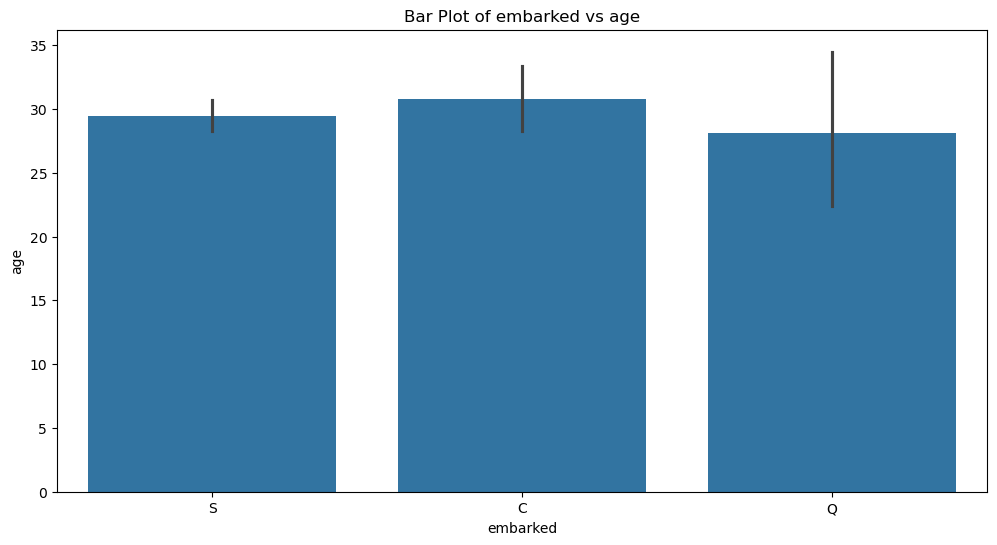

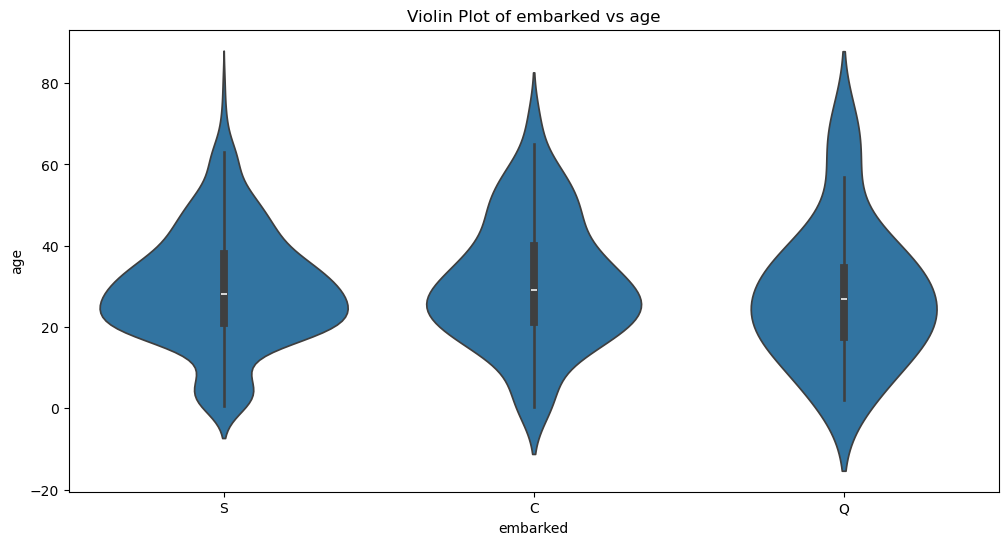

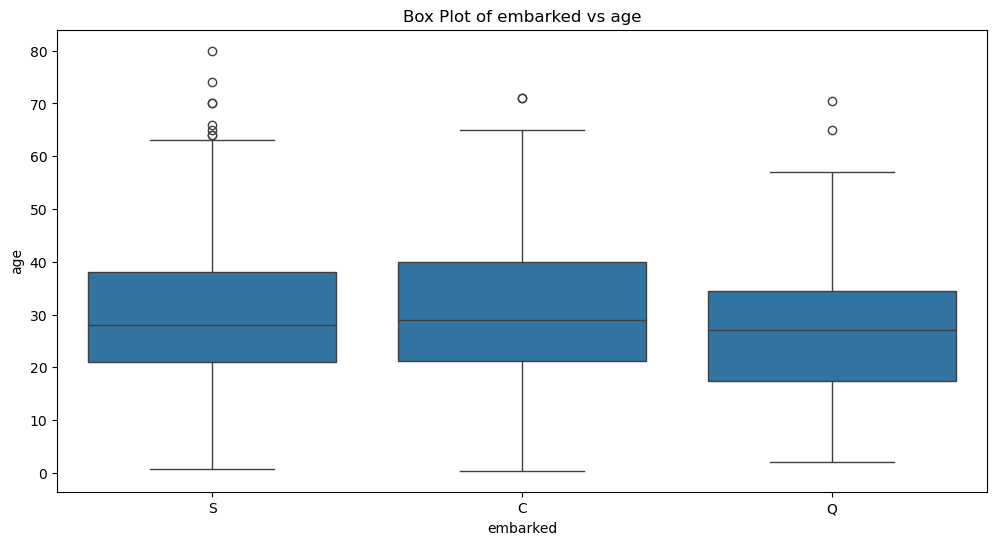

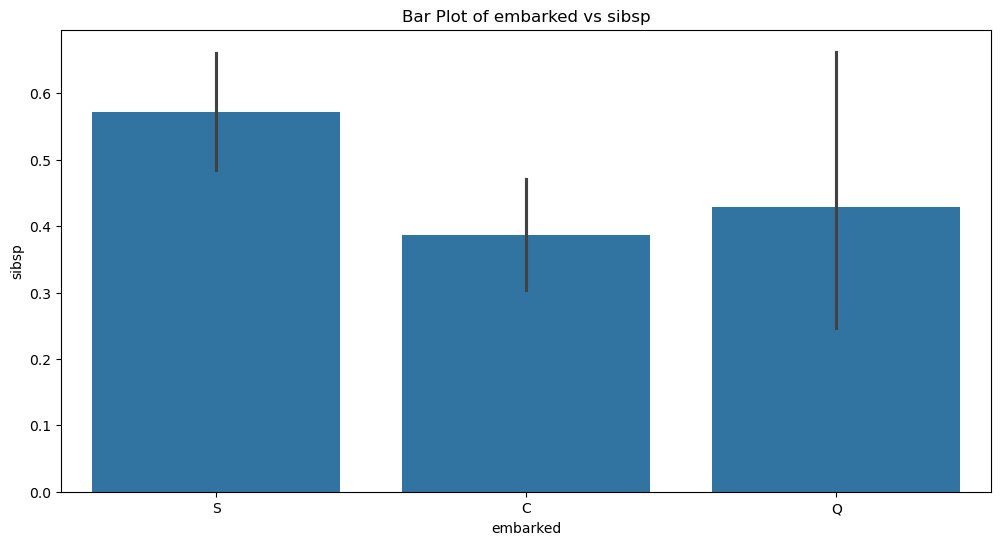

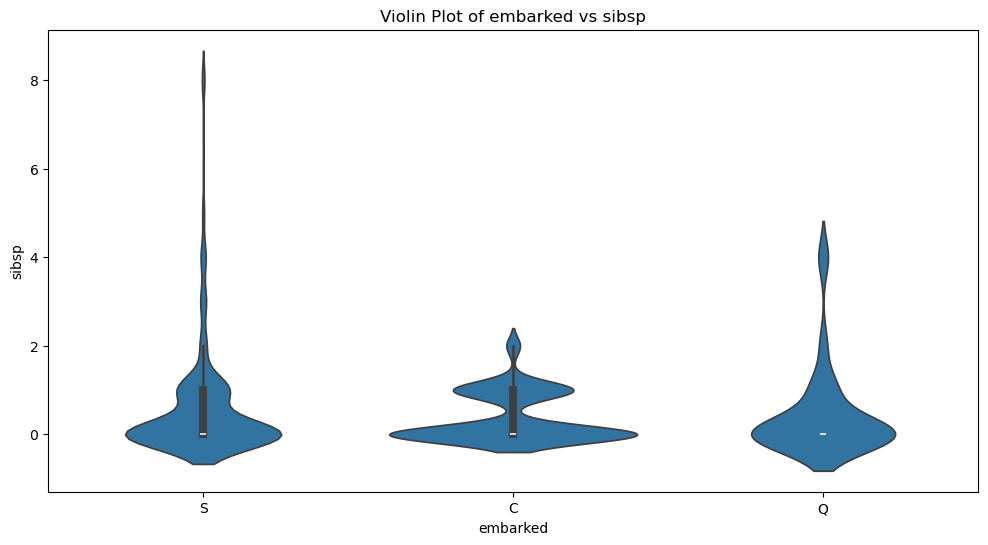

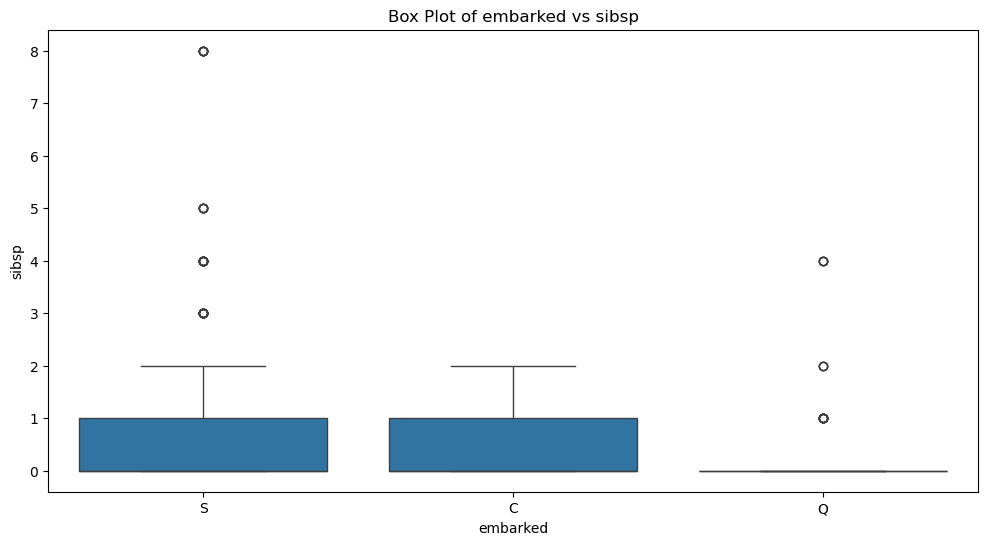

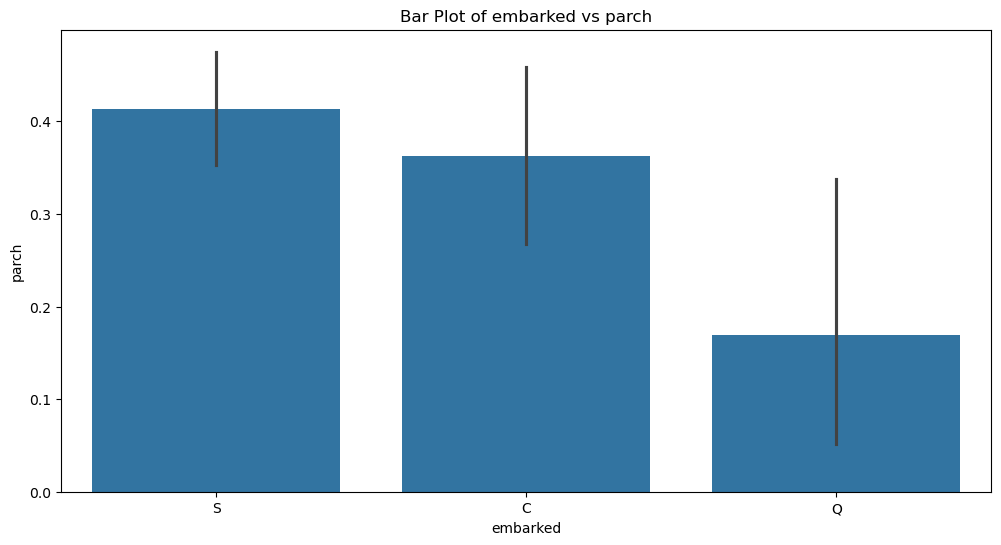

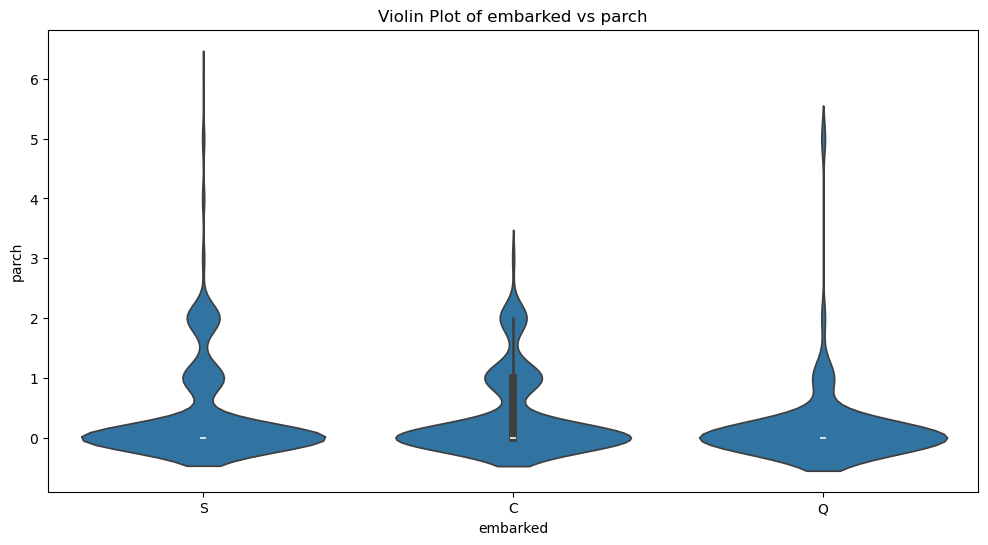

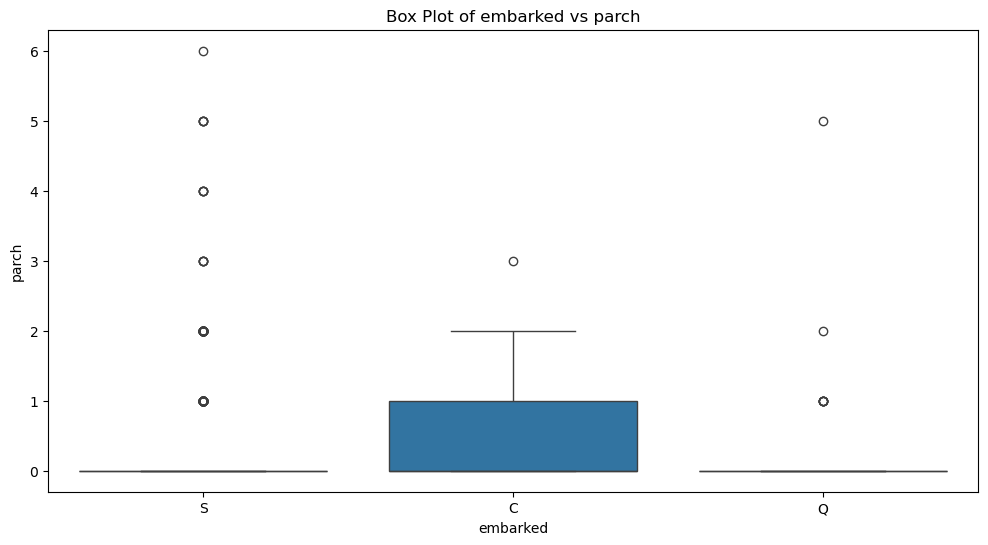

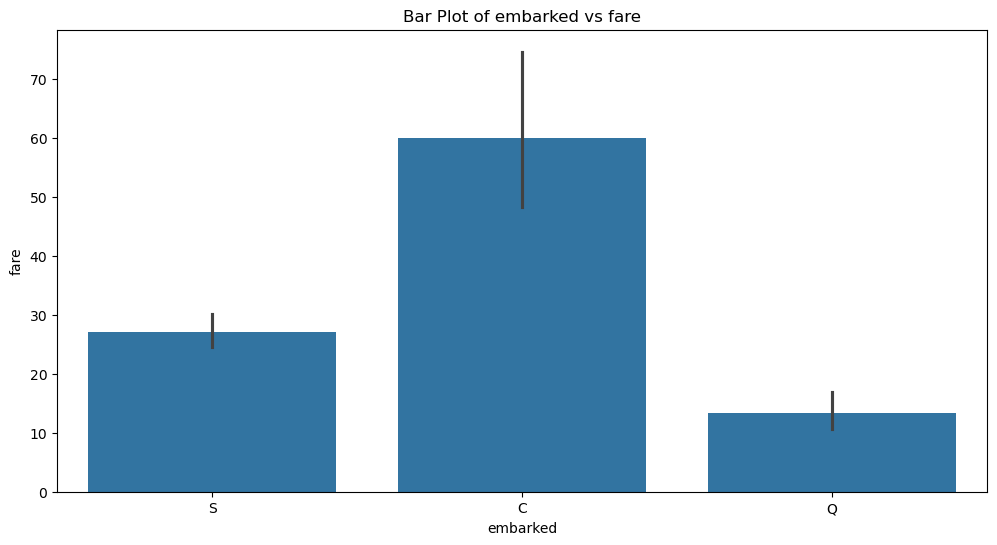

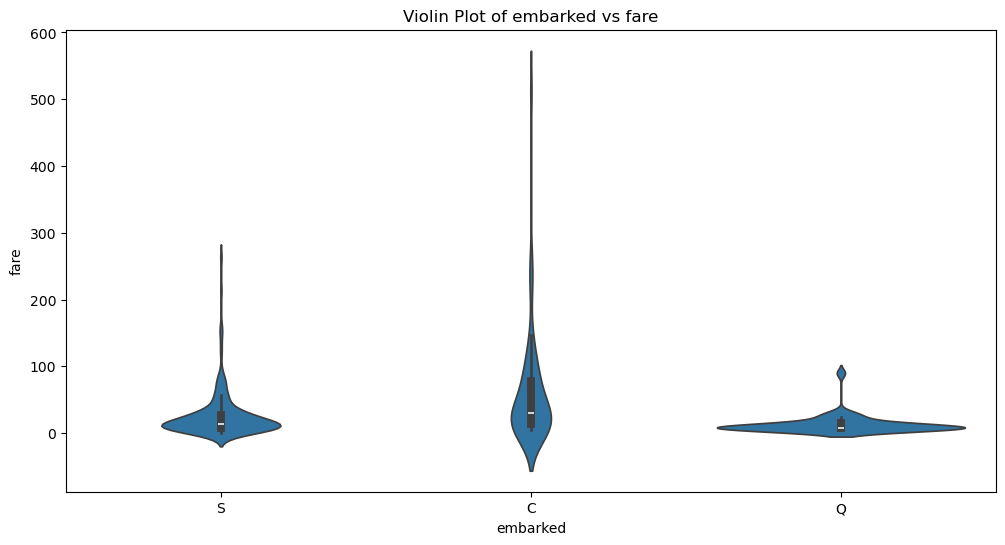

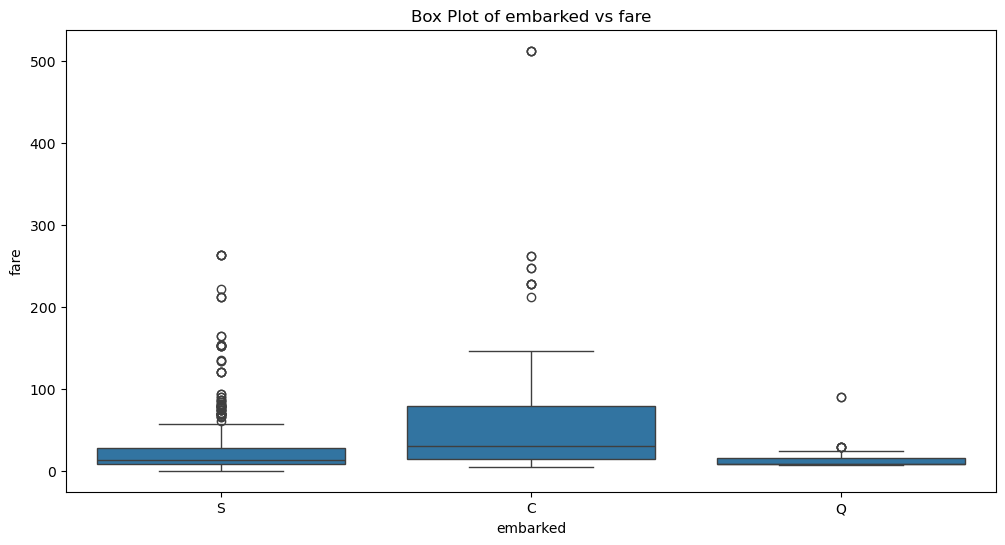

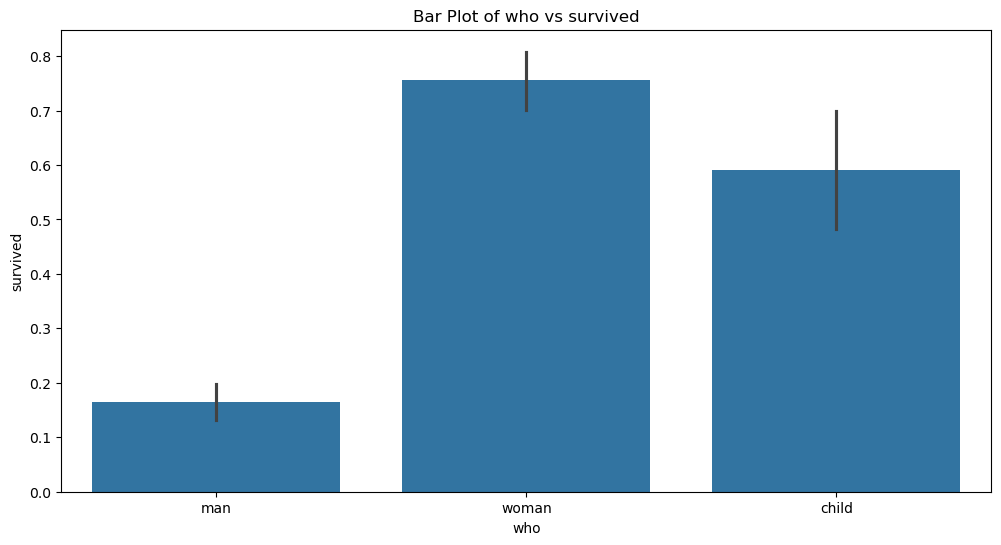

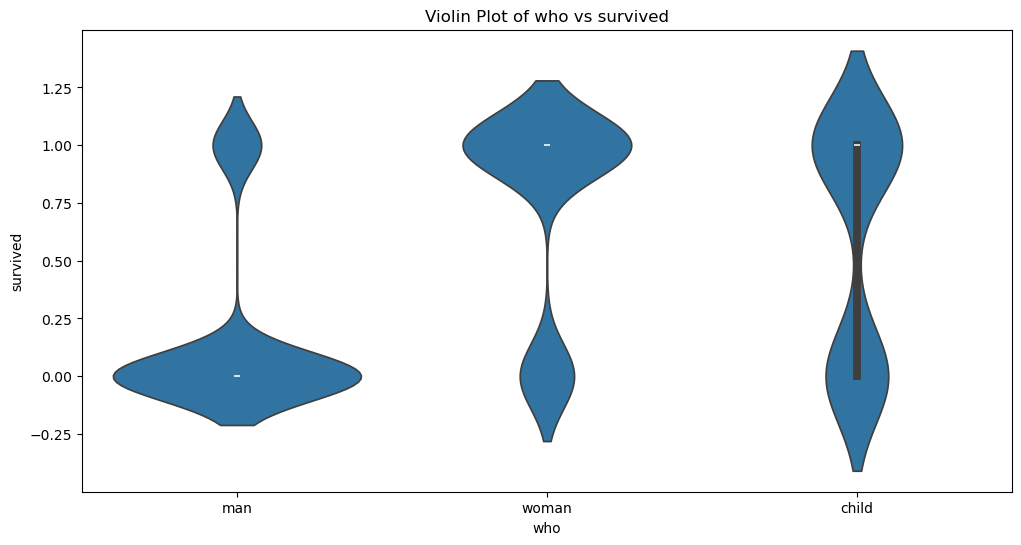

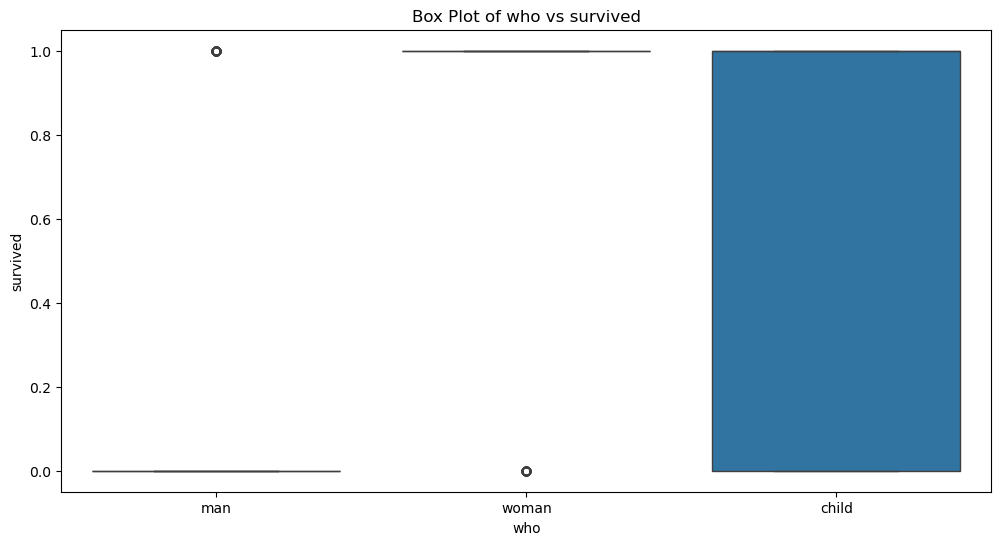

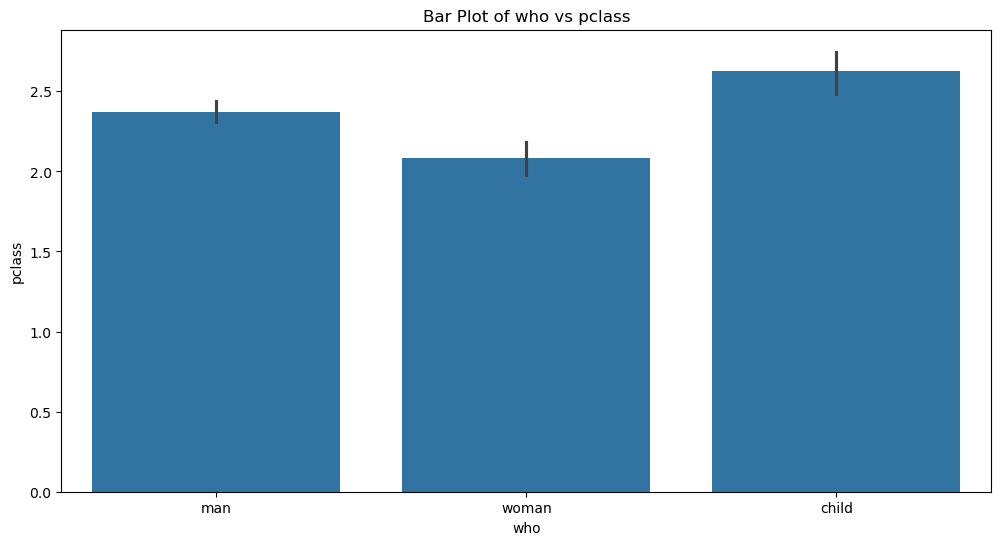

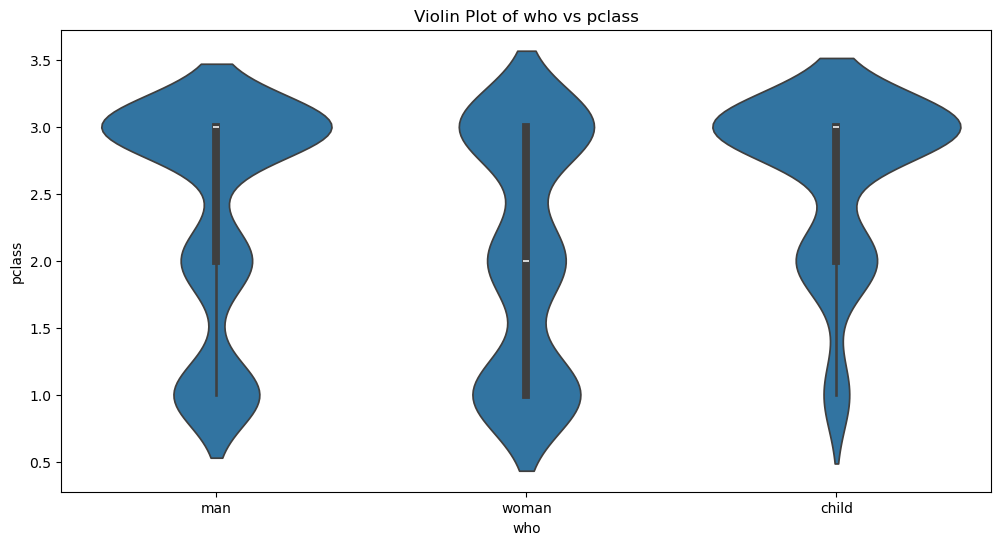

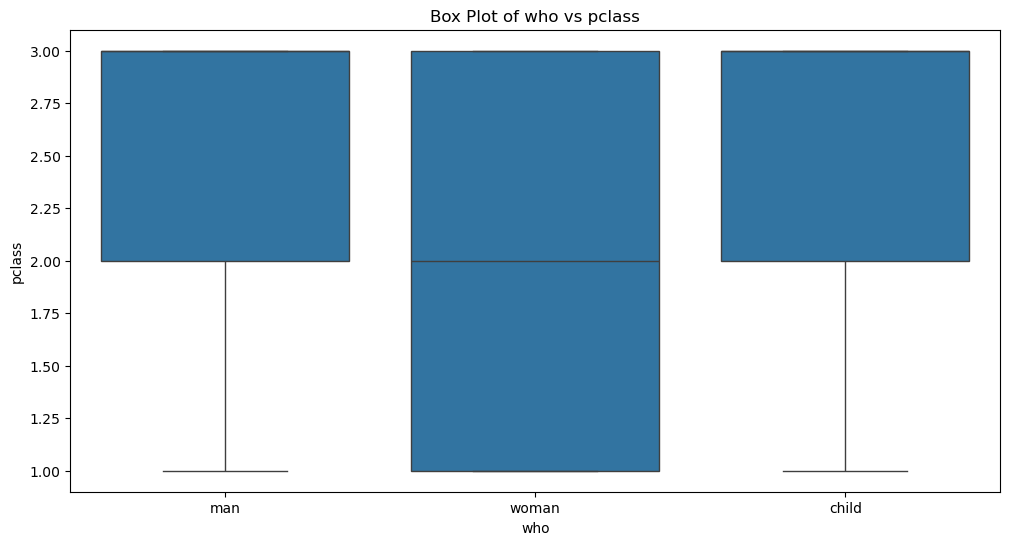

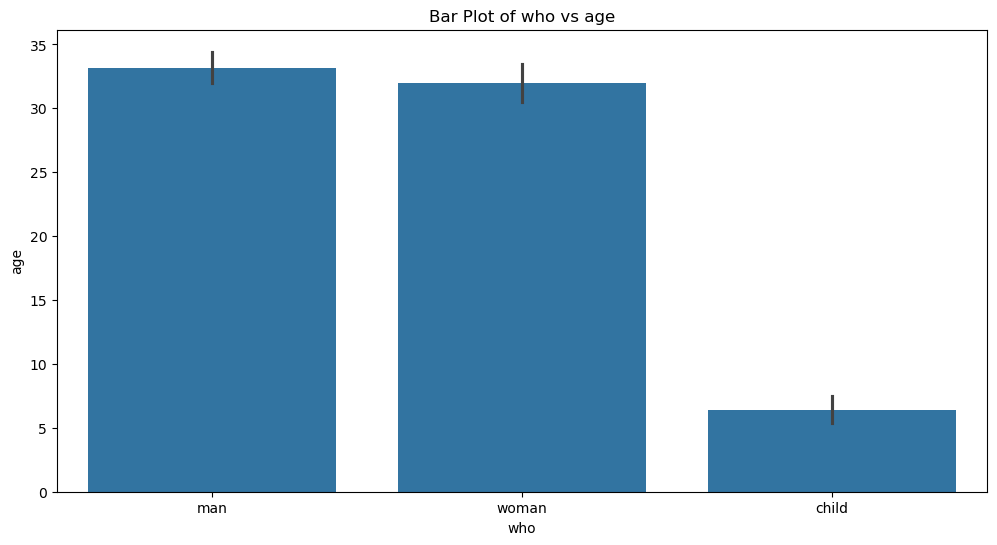

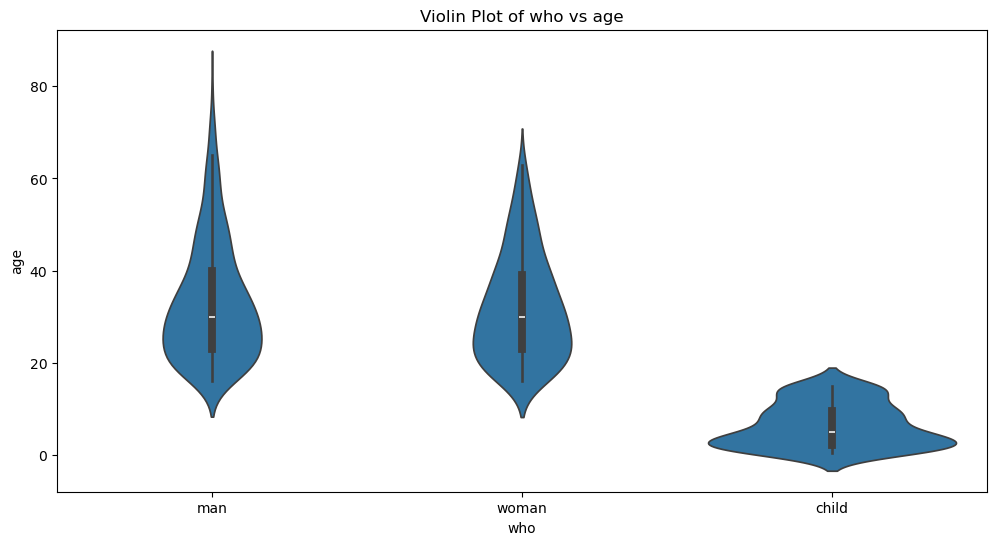

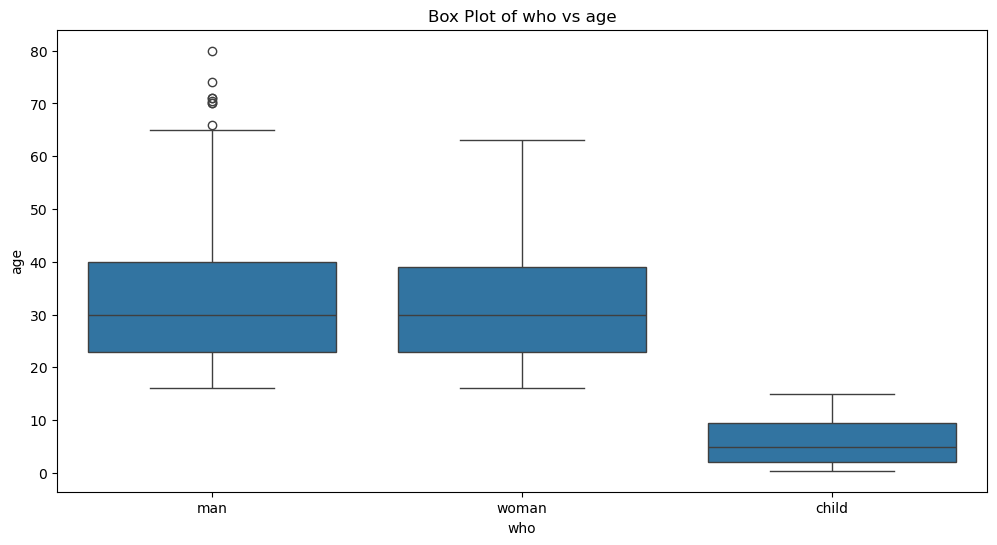

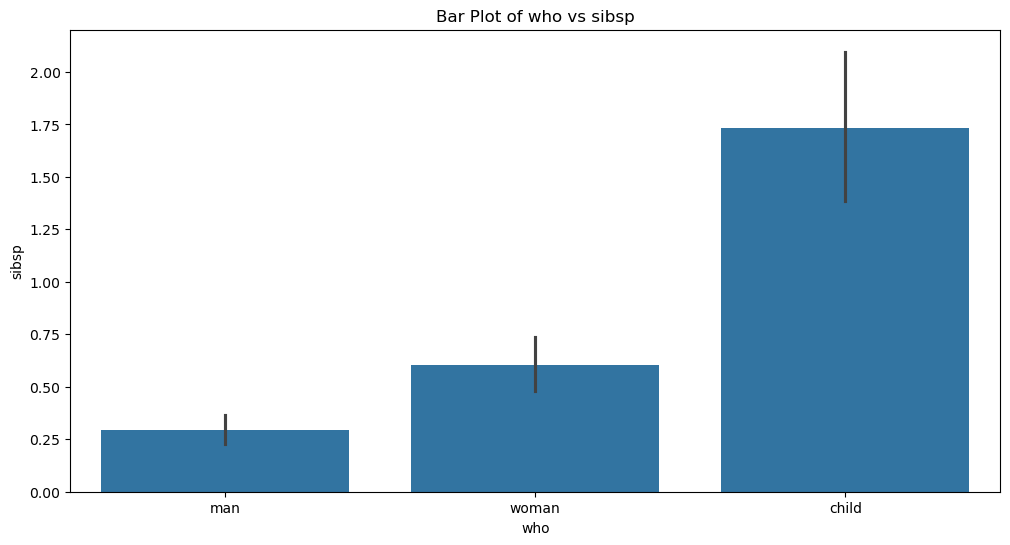

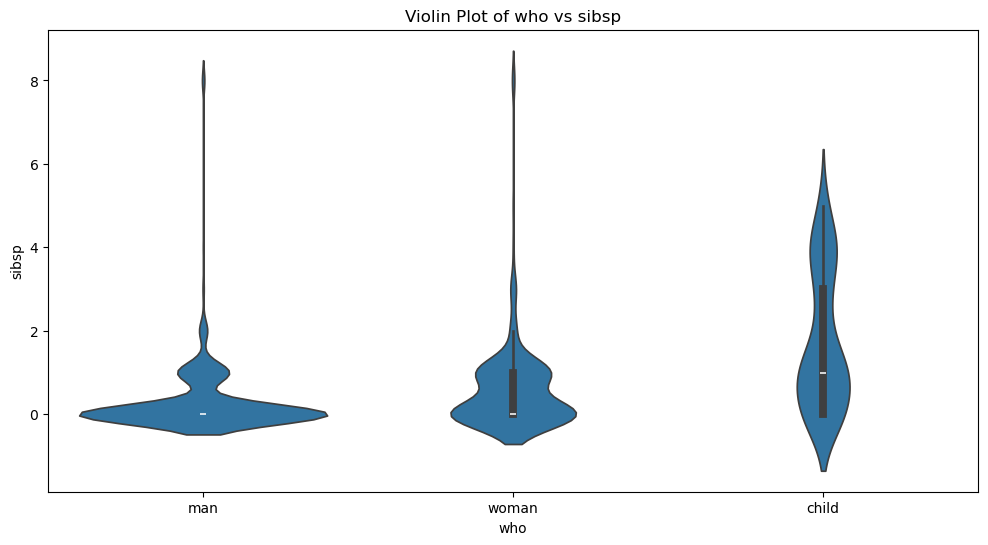

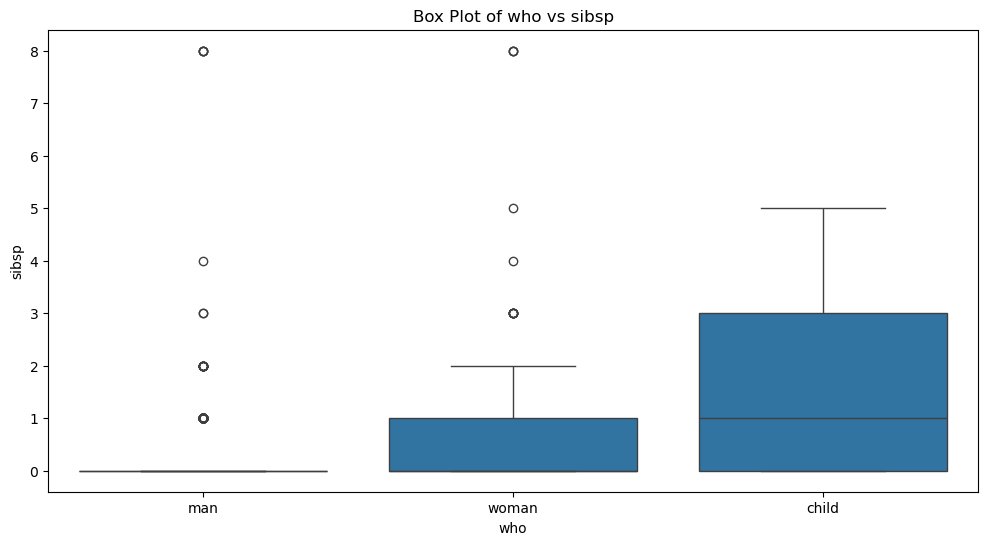

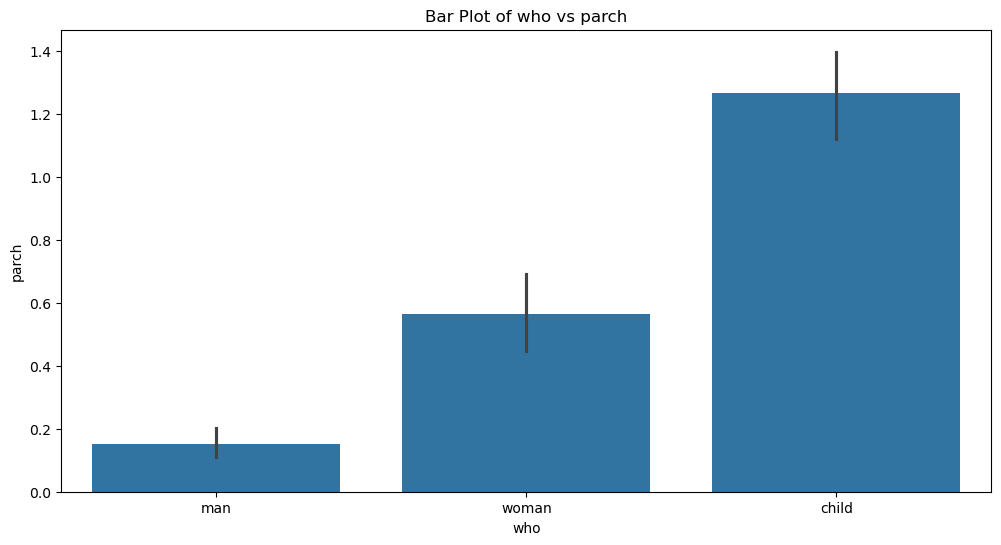

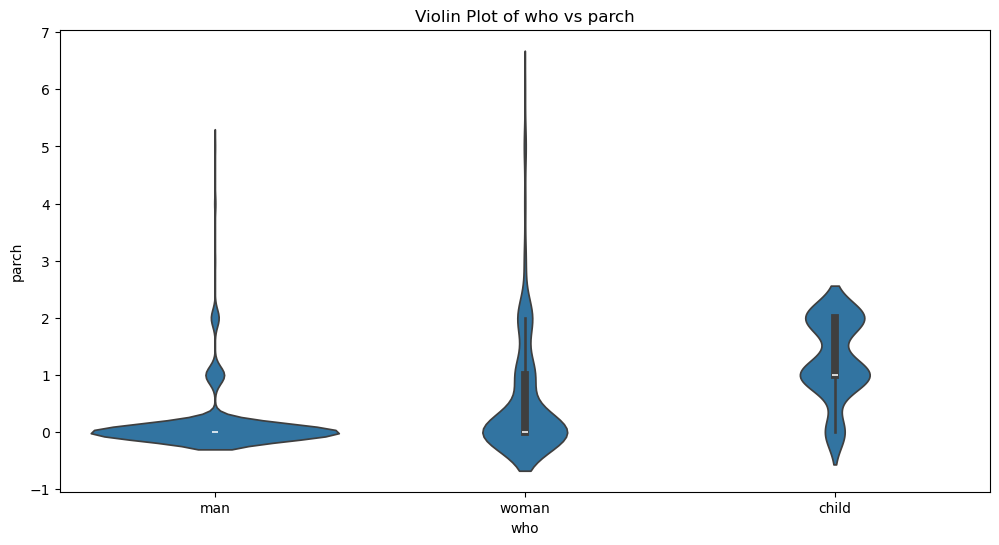

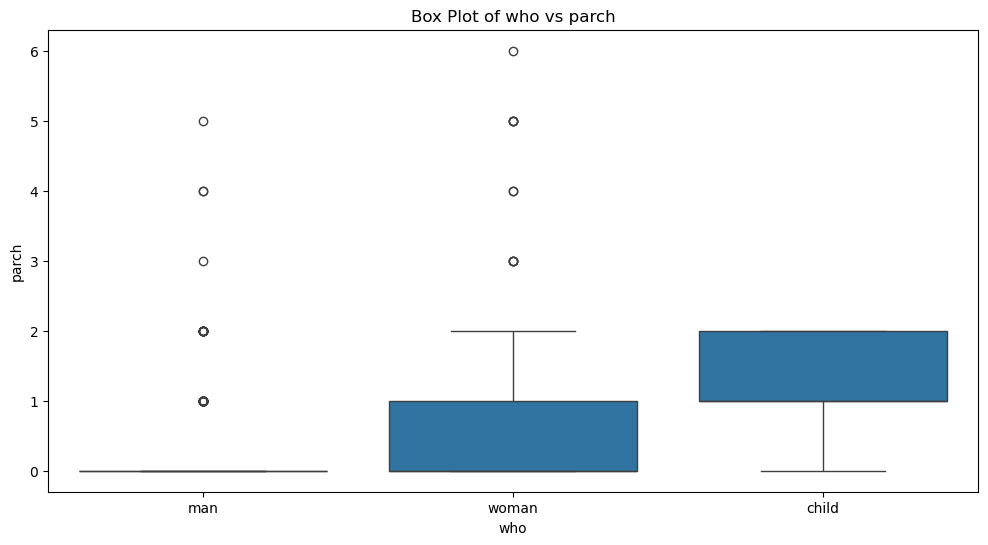

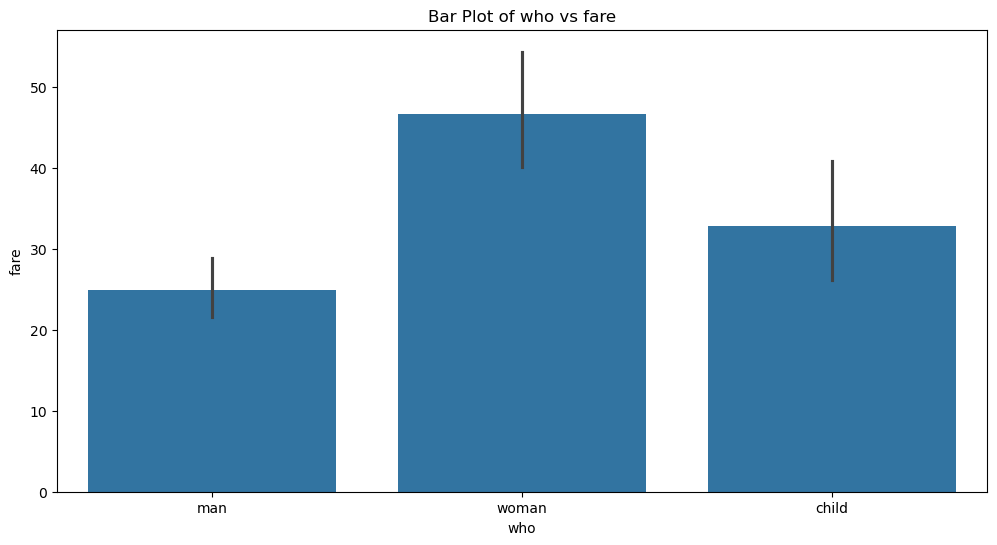

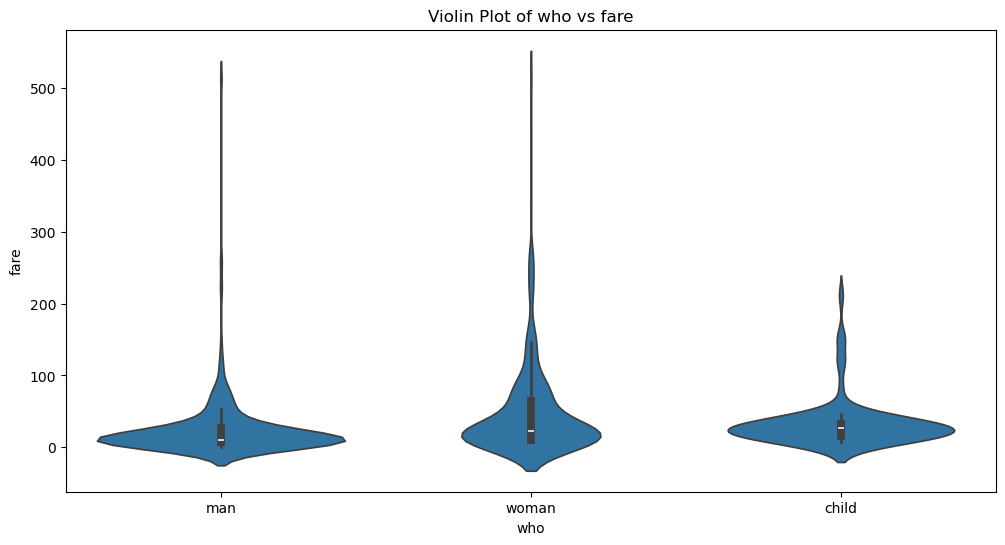

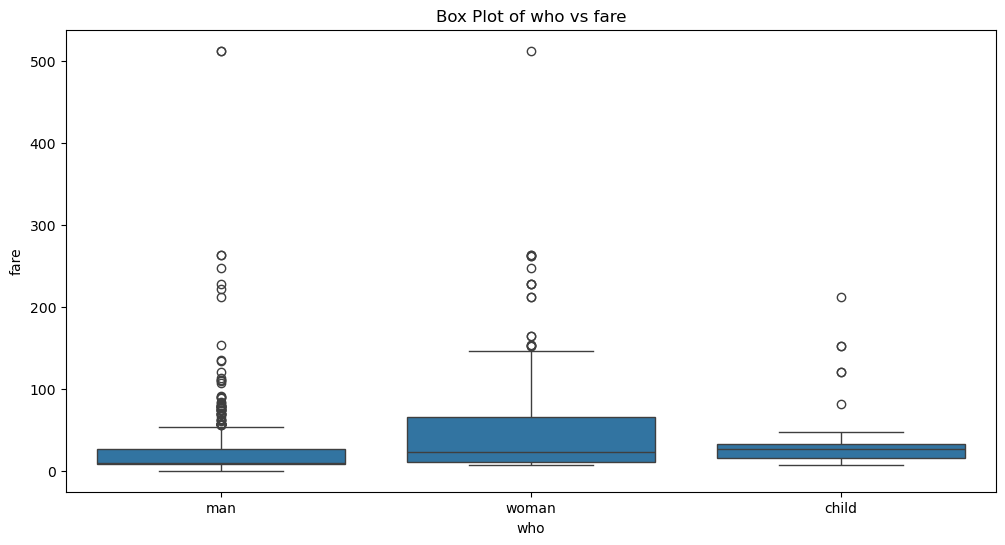

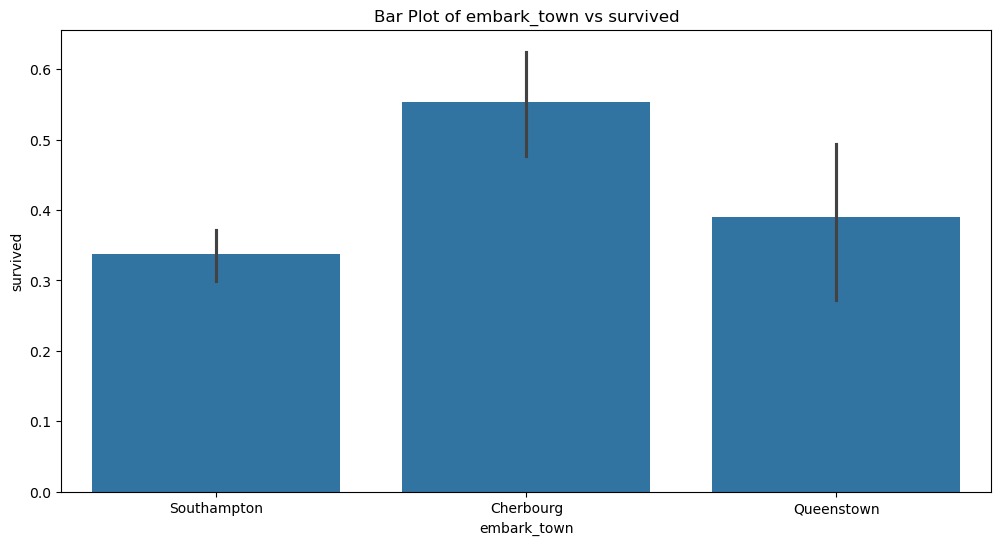

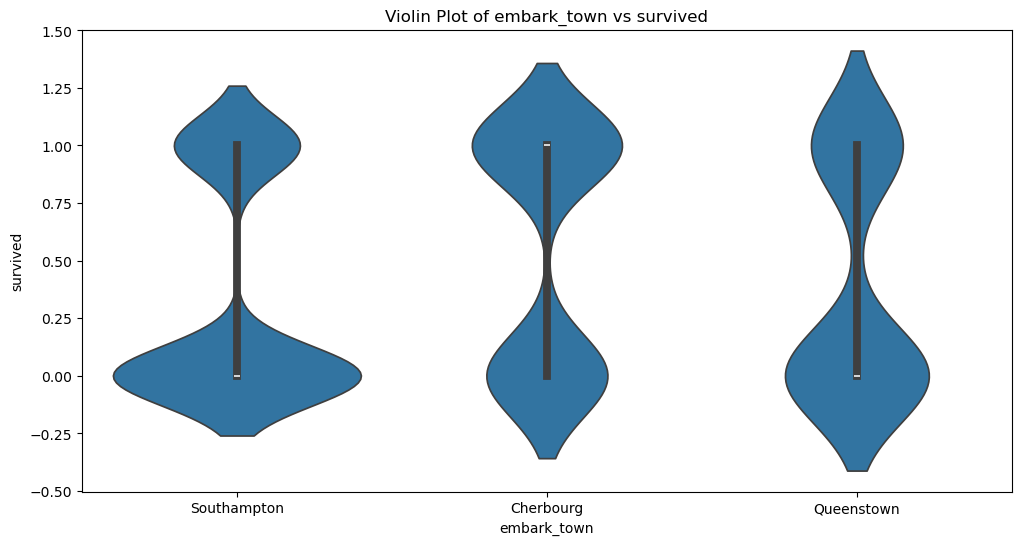

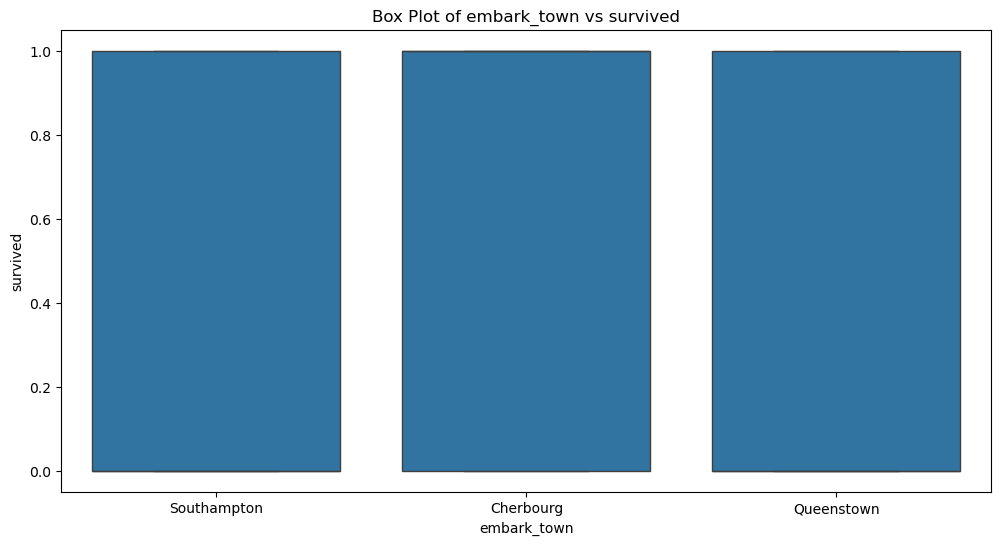

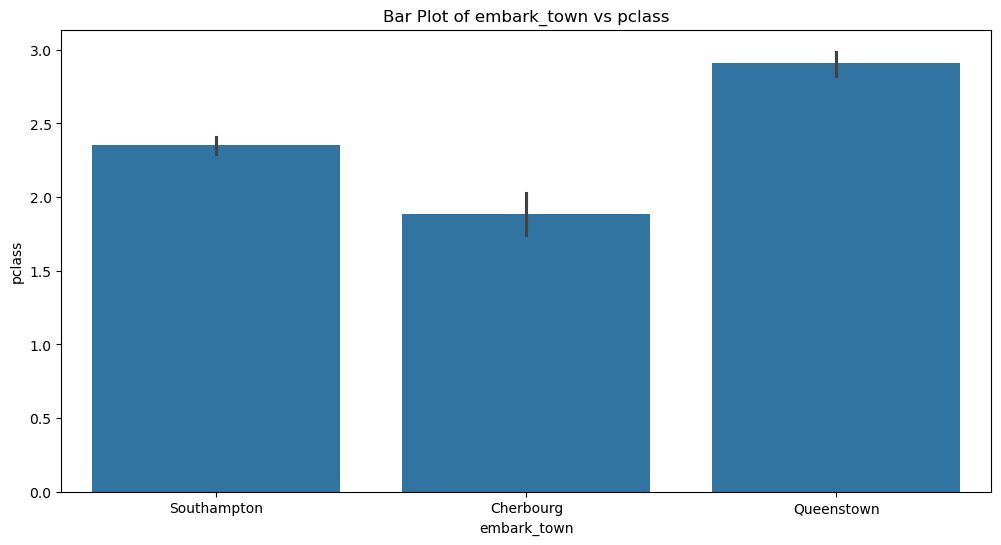

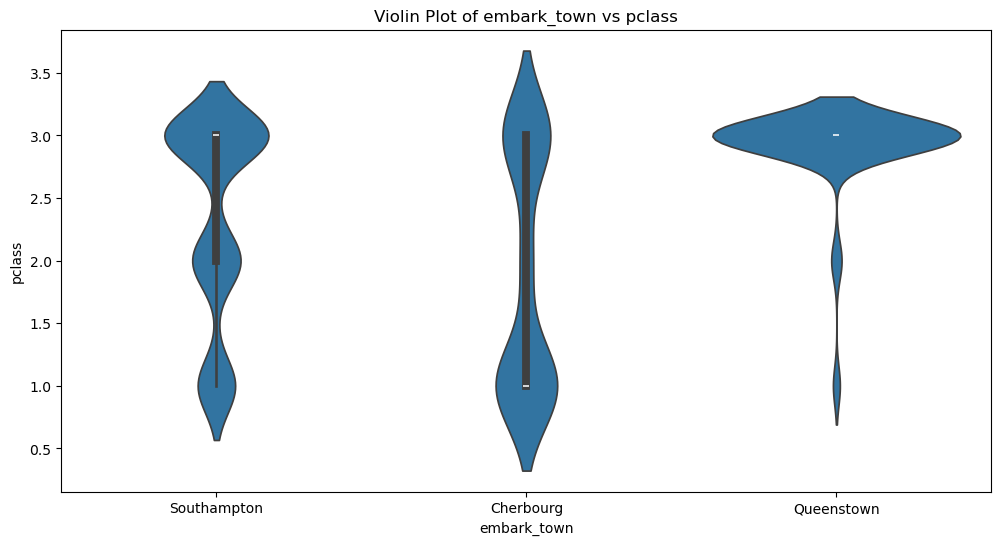

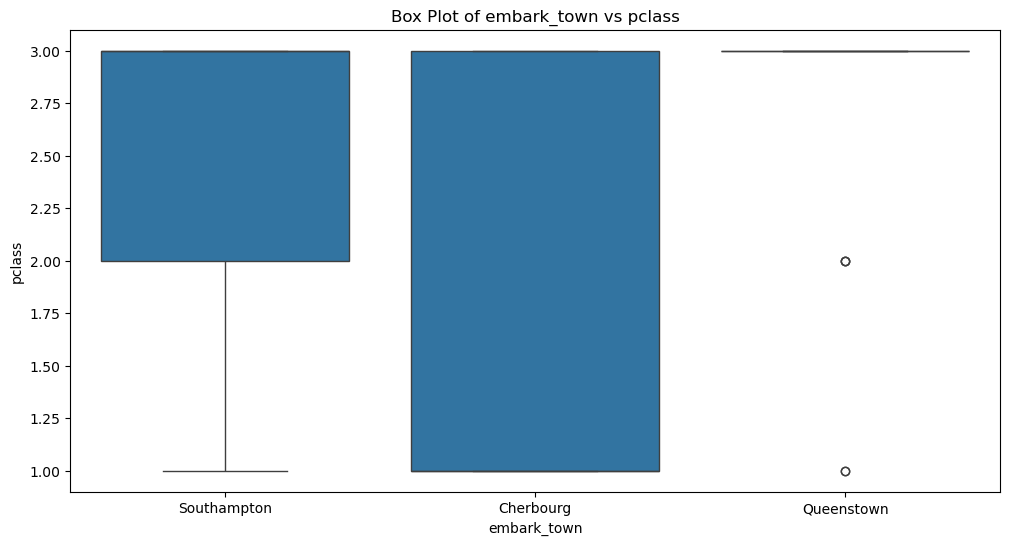

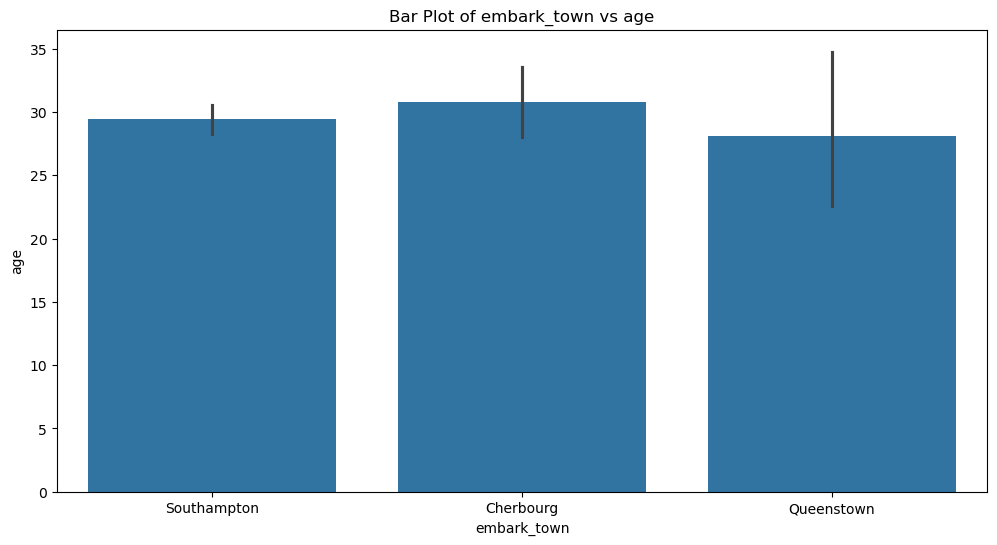

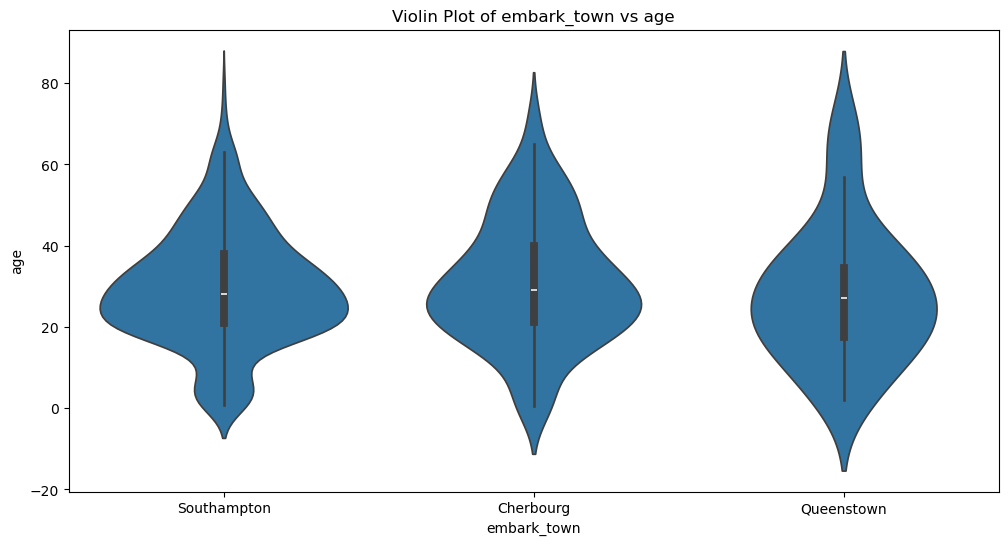

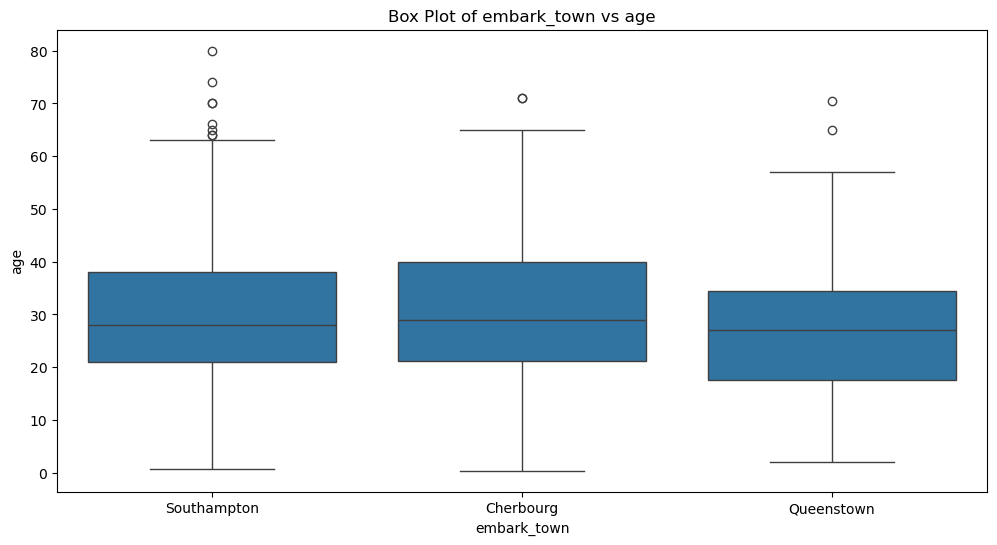

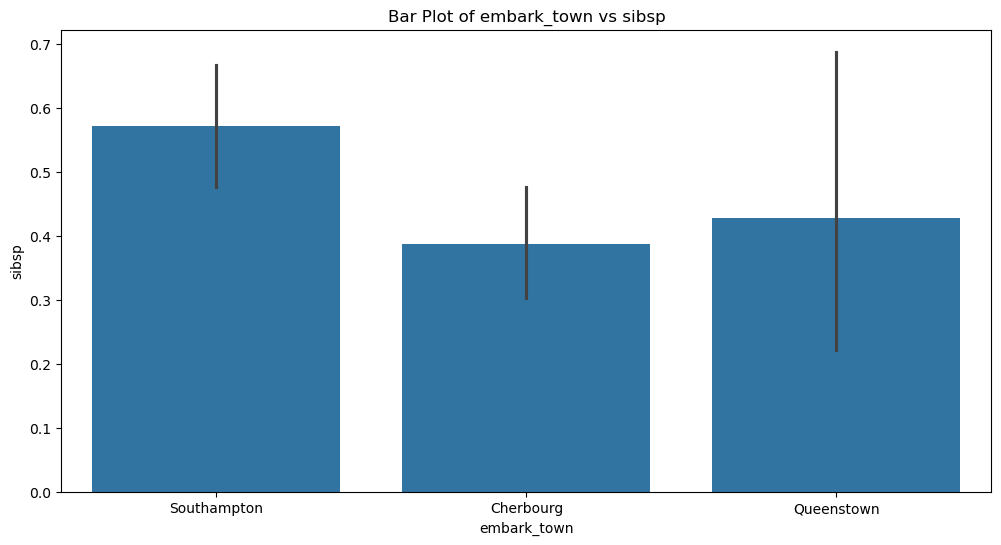

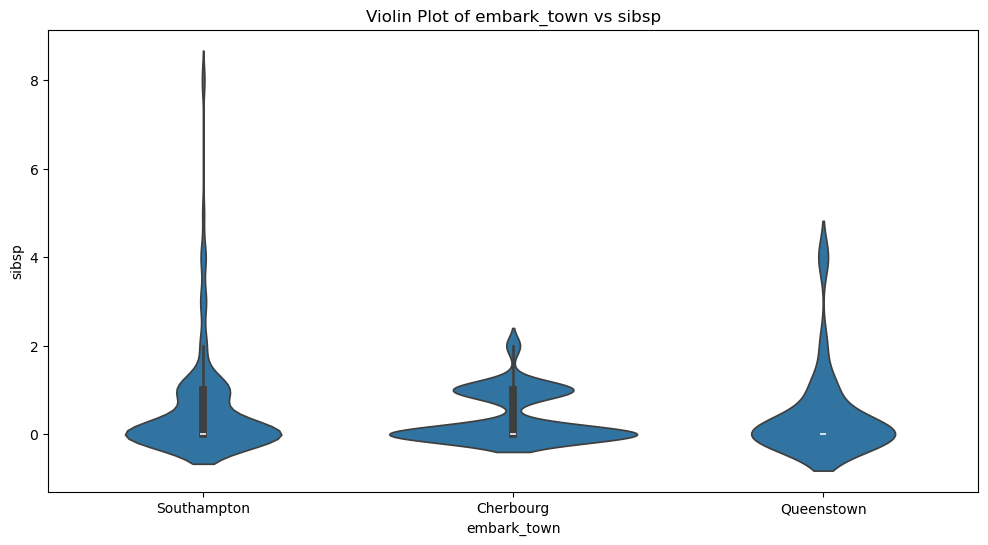

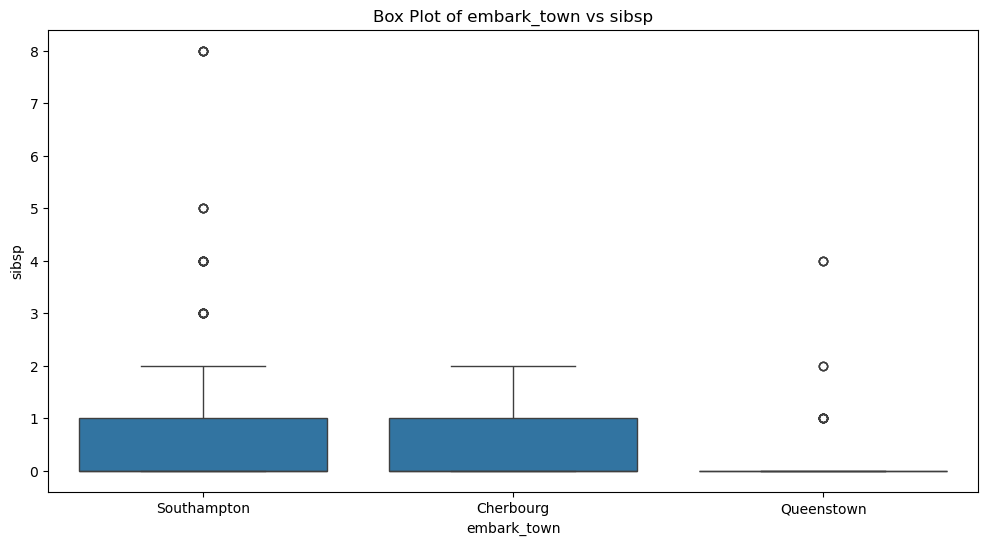

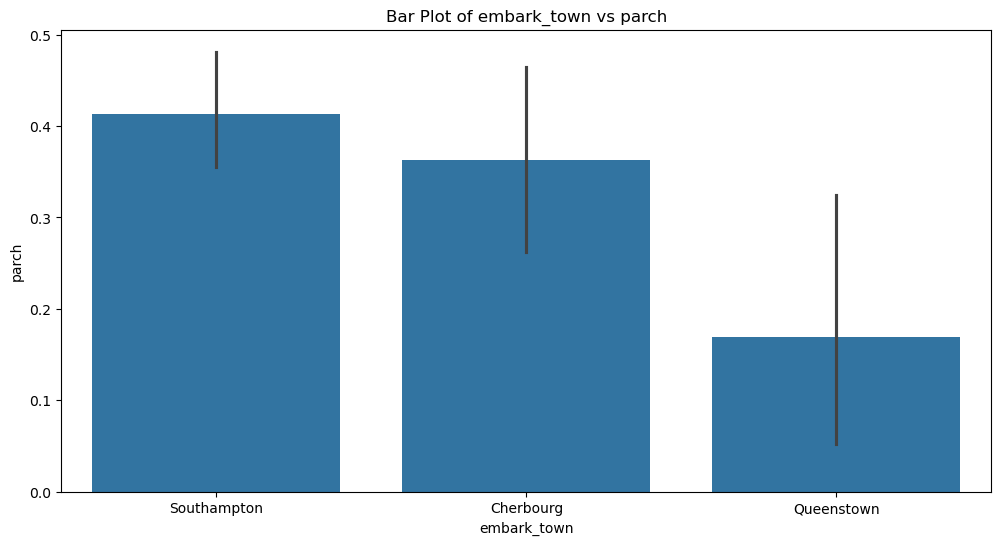

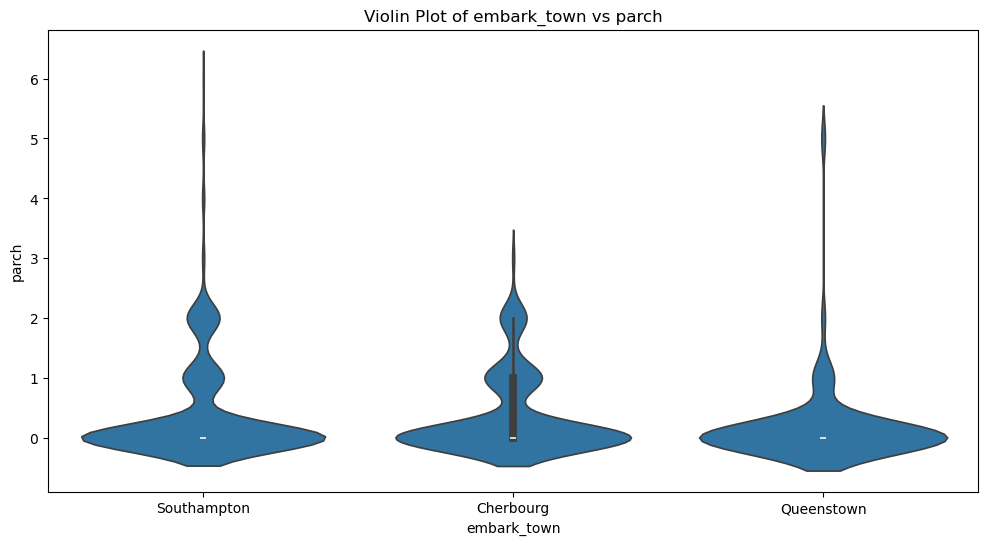

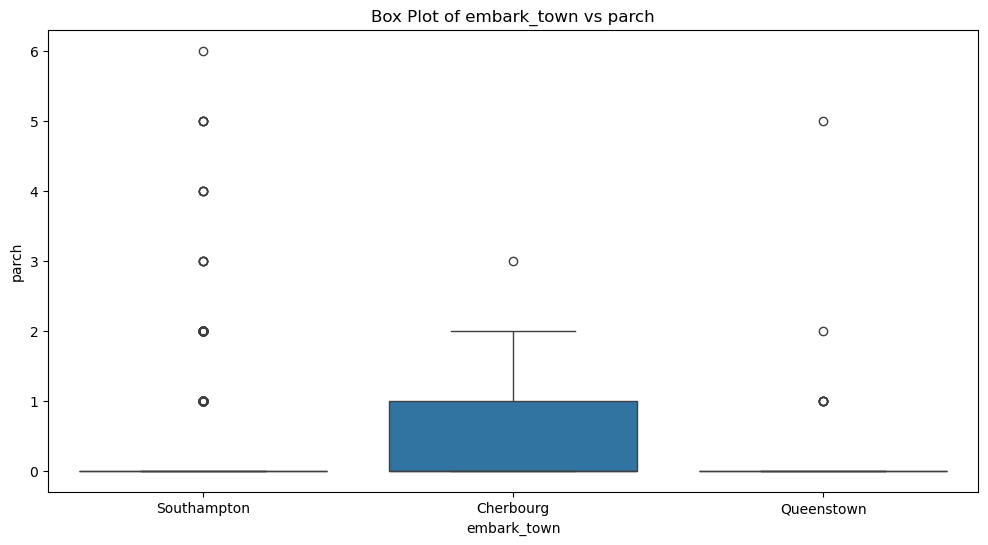

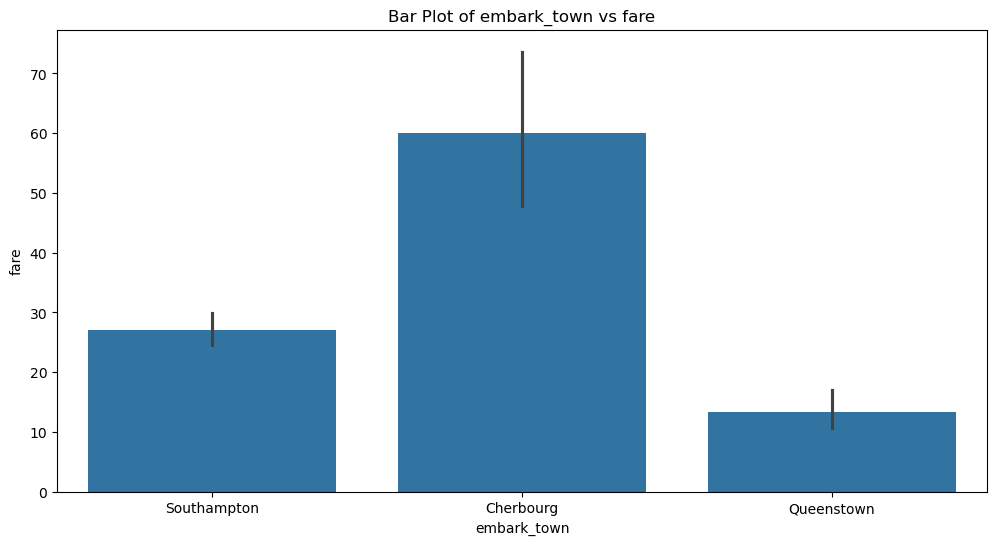

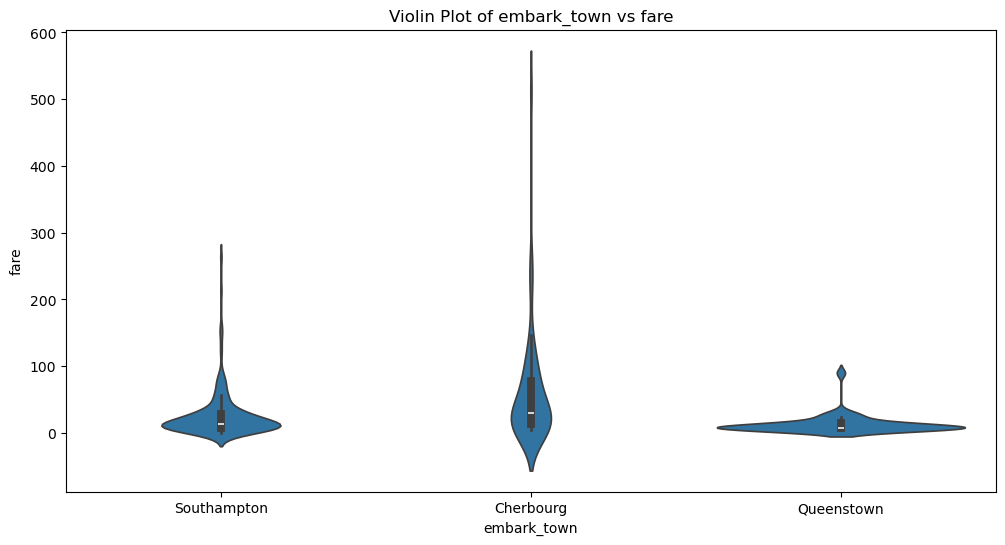

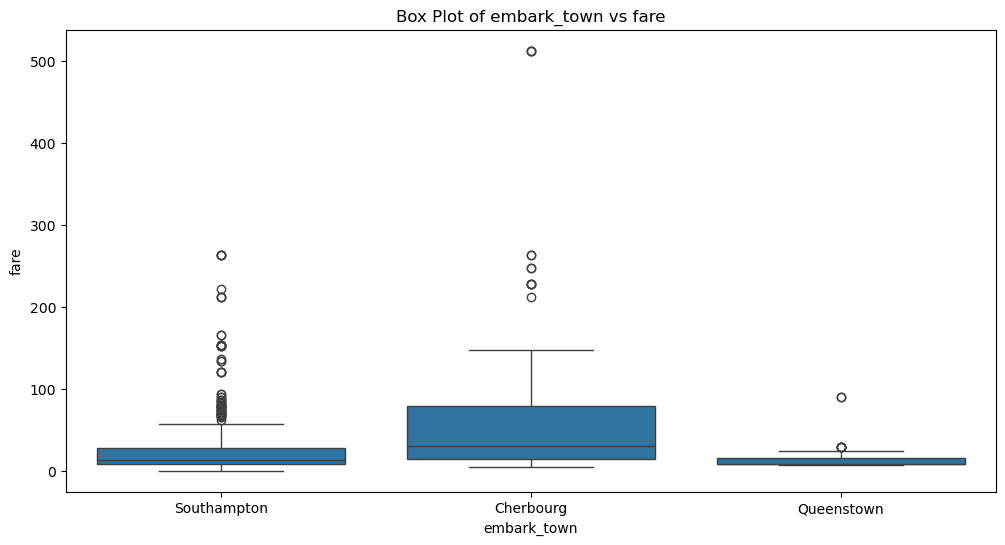

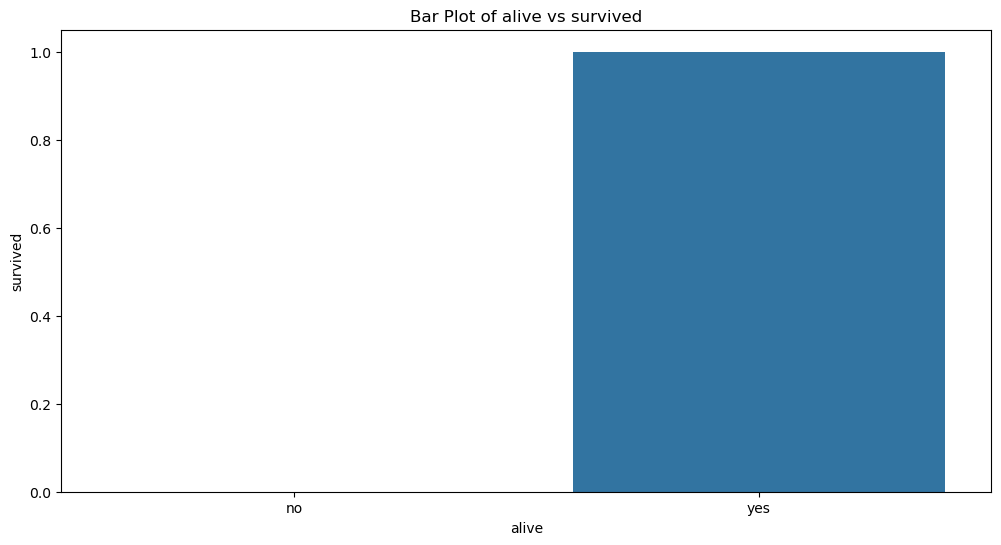

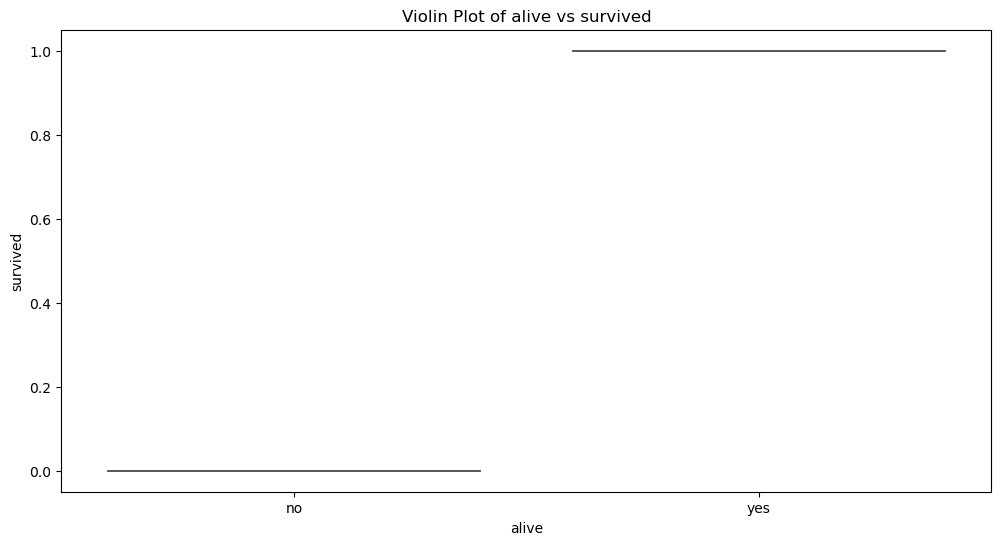

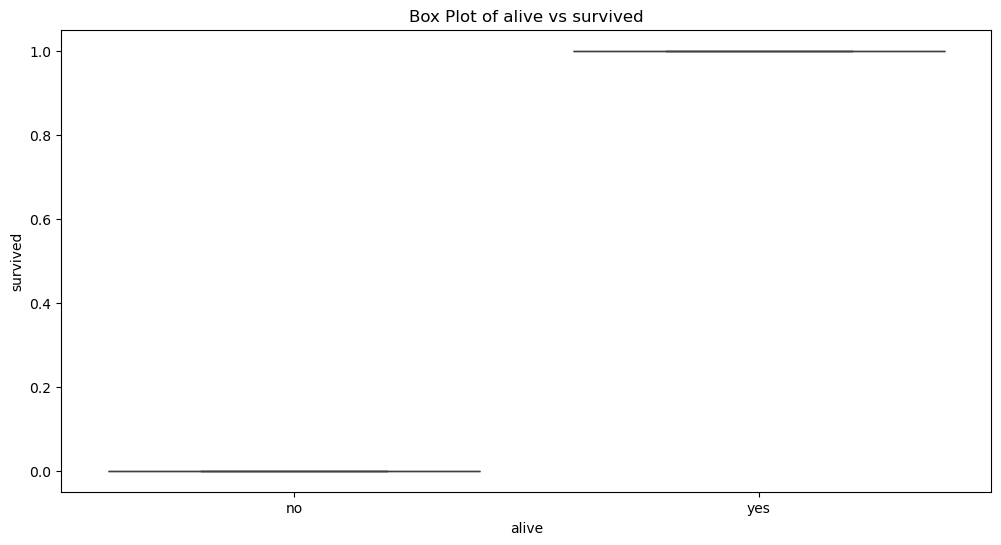

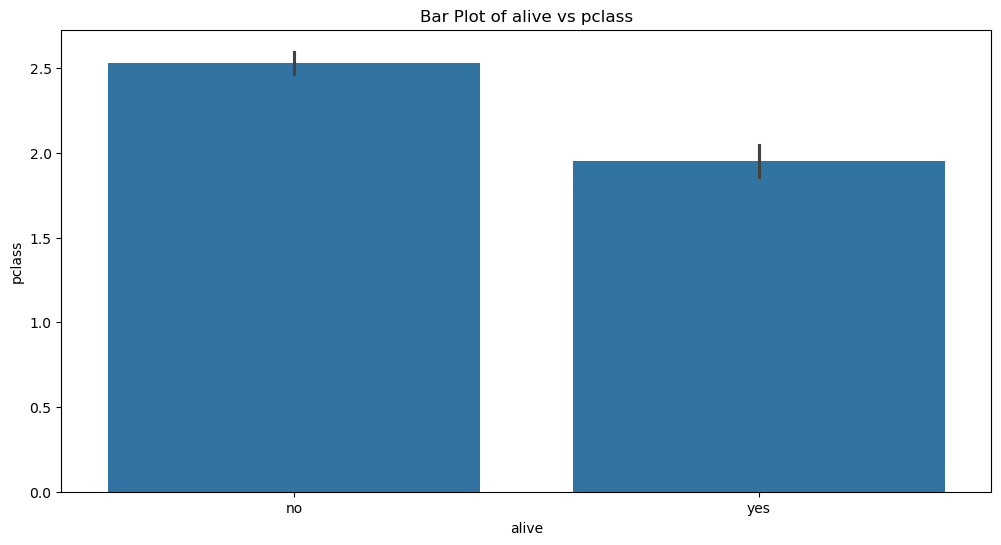

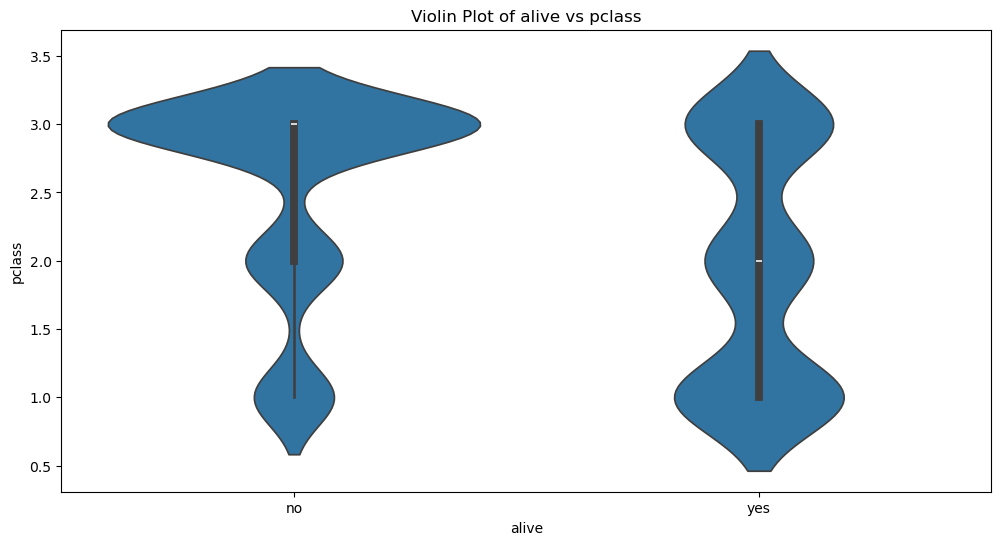

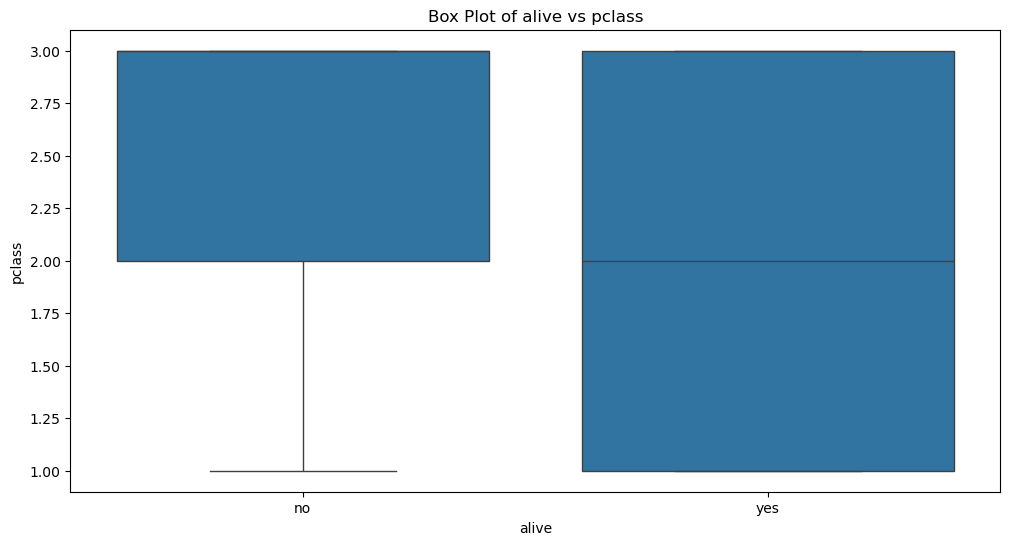

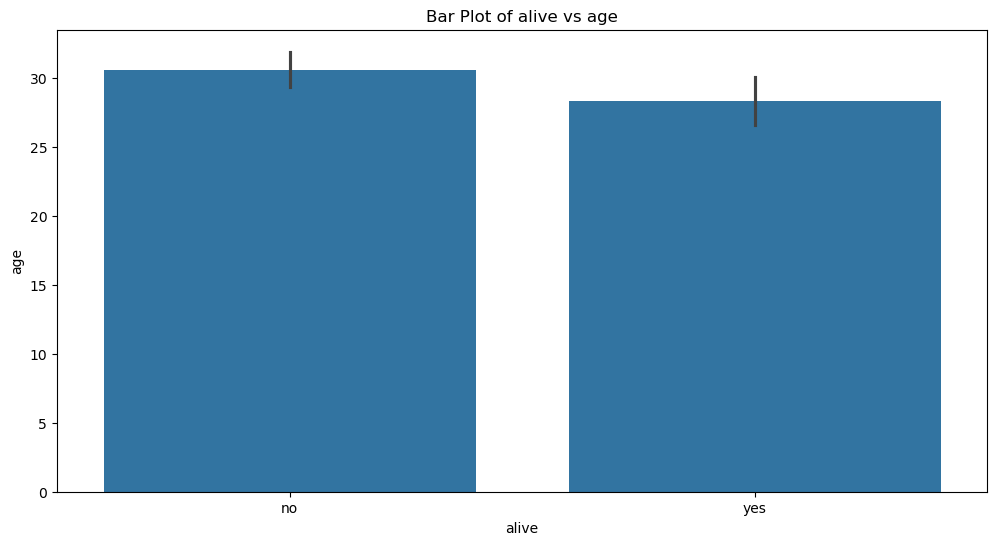

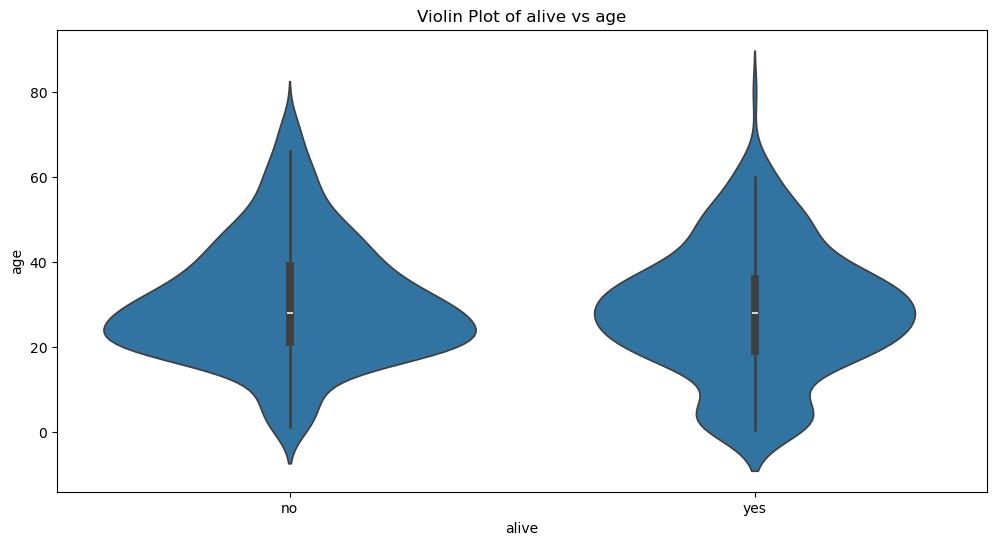

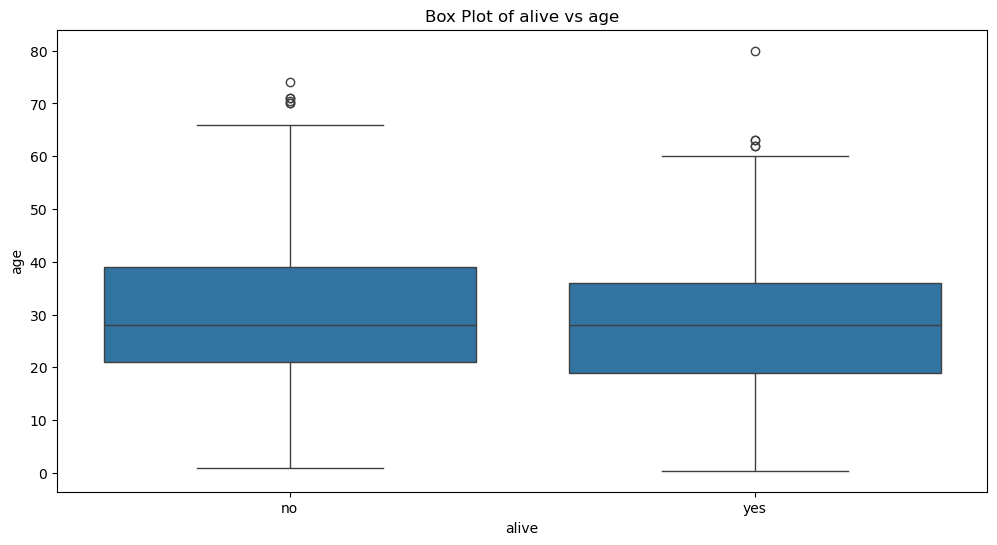

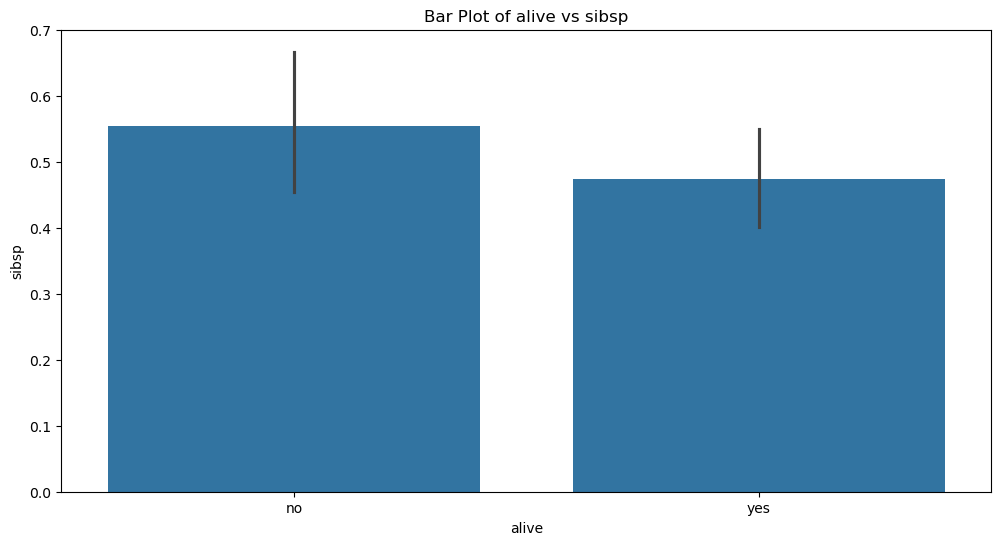

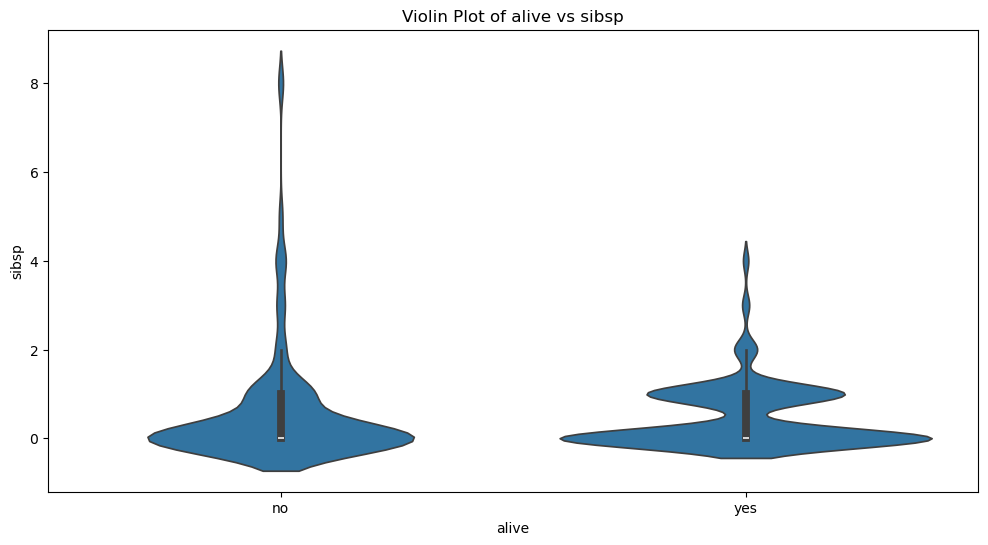

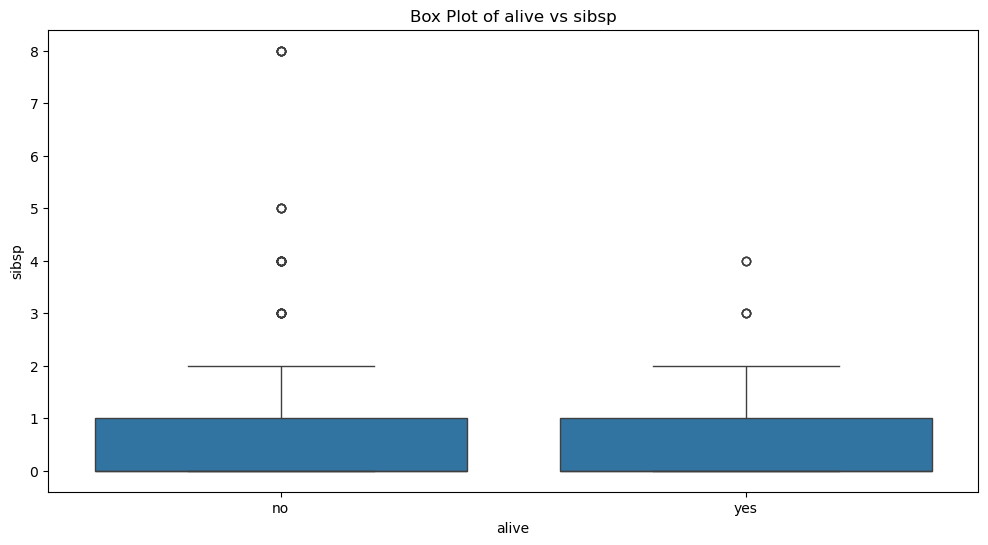

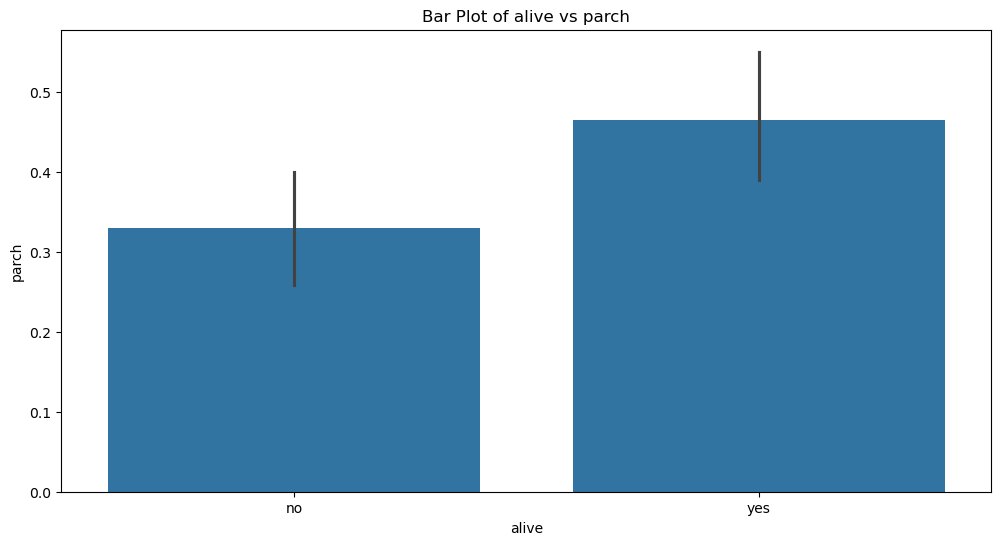

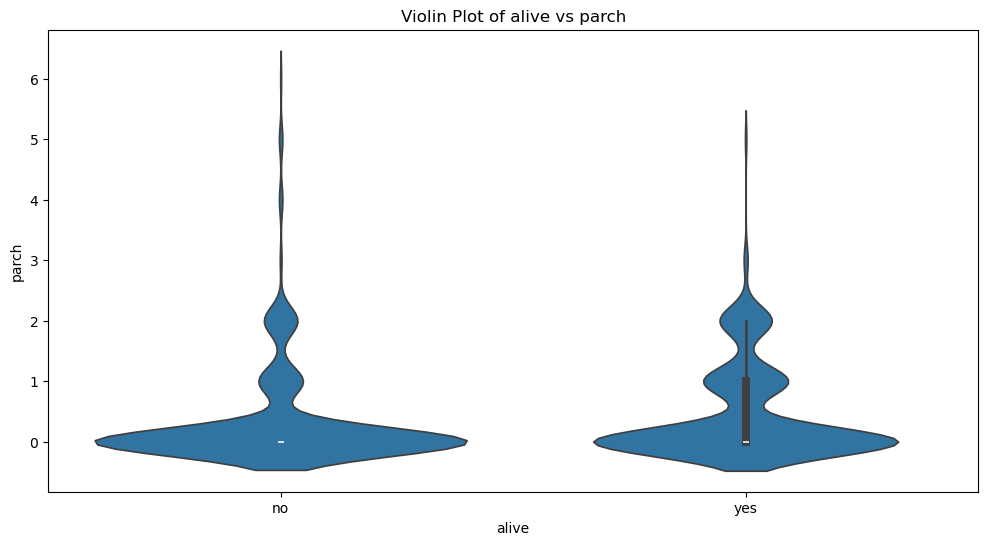

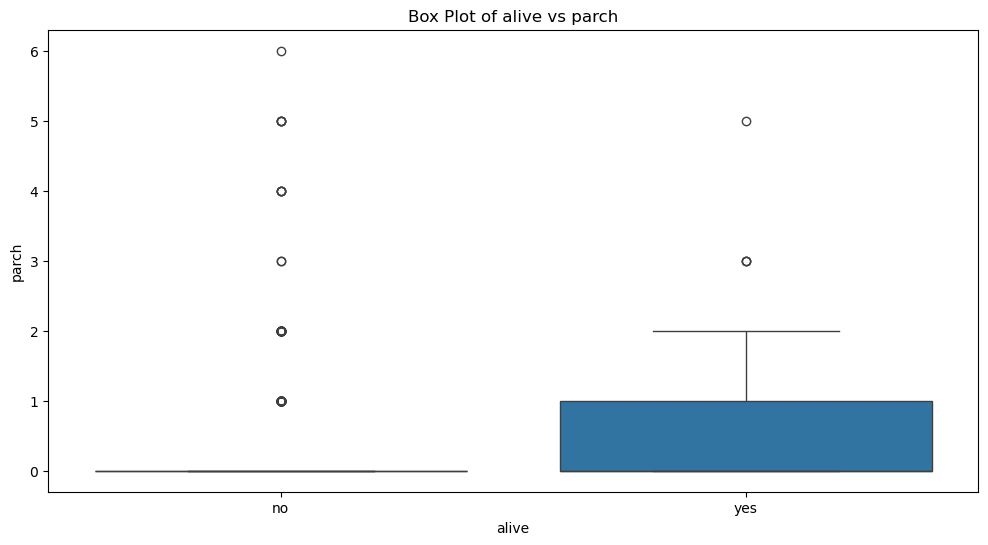

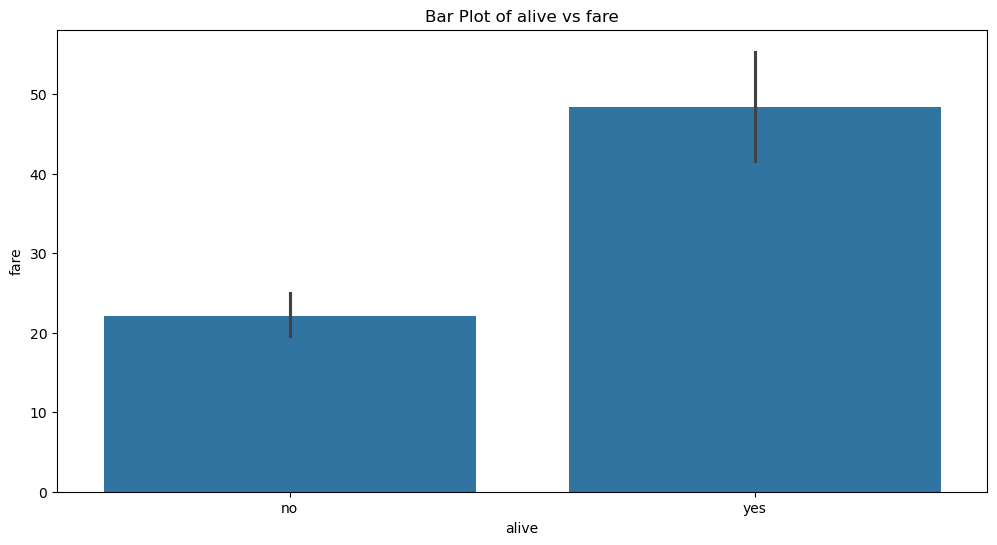

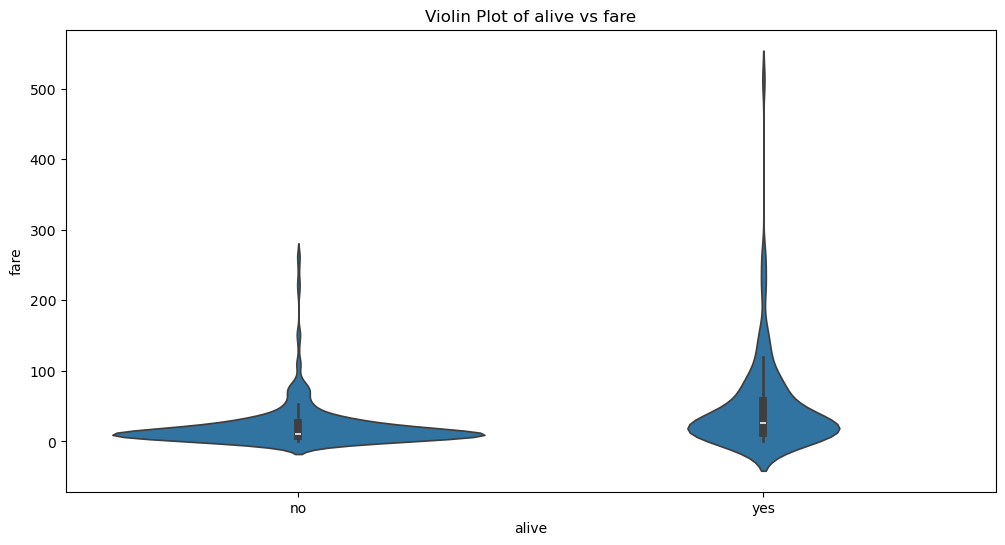

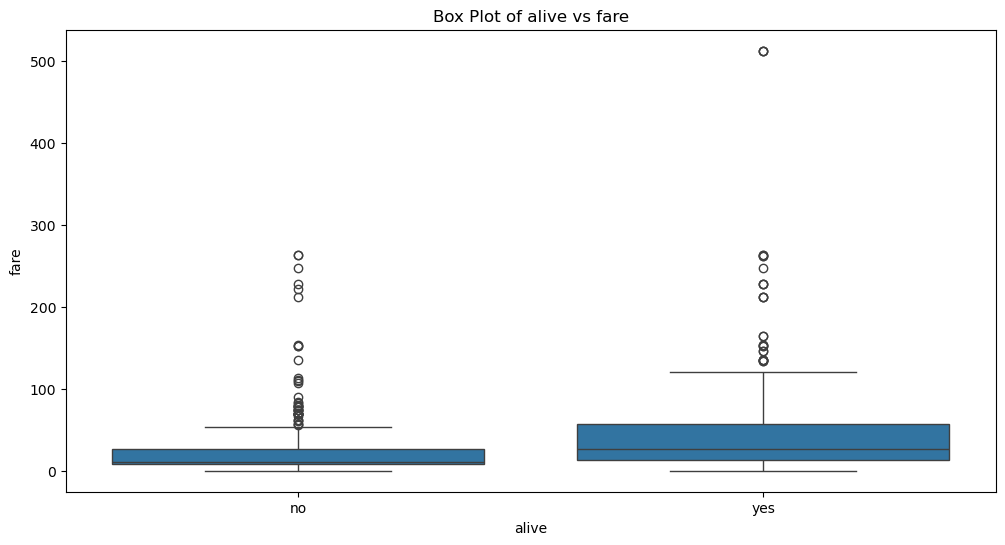

In [14]:
def plot_categorical_numerical(titanic):
    categorical = titanic.select_dtypes(include=['object']).columns
    numerical = titanic.select_dtypes(include=['float64', 'int64']).columns
    
    for cat in categorical:
        for num in numerical:
            plt.figure(figsize=(12, 6))
            sns.barplot(x=cat, y=num, data=titanic)
            plt.title(f'Bar Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat, y=num, data=titanic)
            plt.title(f'Violin Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat, y=num, data=titanic)
            plt.title(f'Box Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()

plot_categorical_numerical(titanic)


## Multivariate Analysis

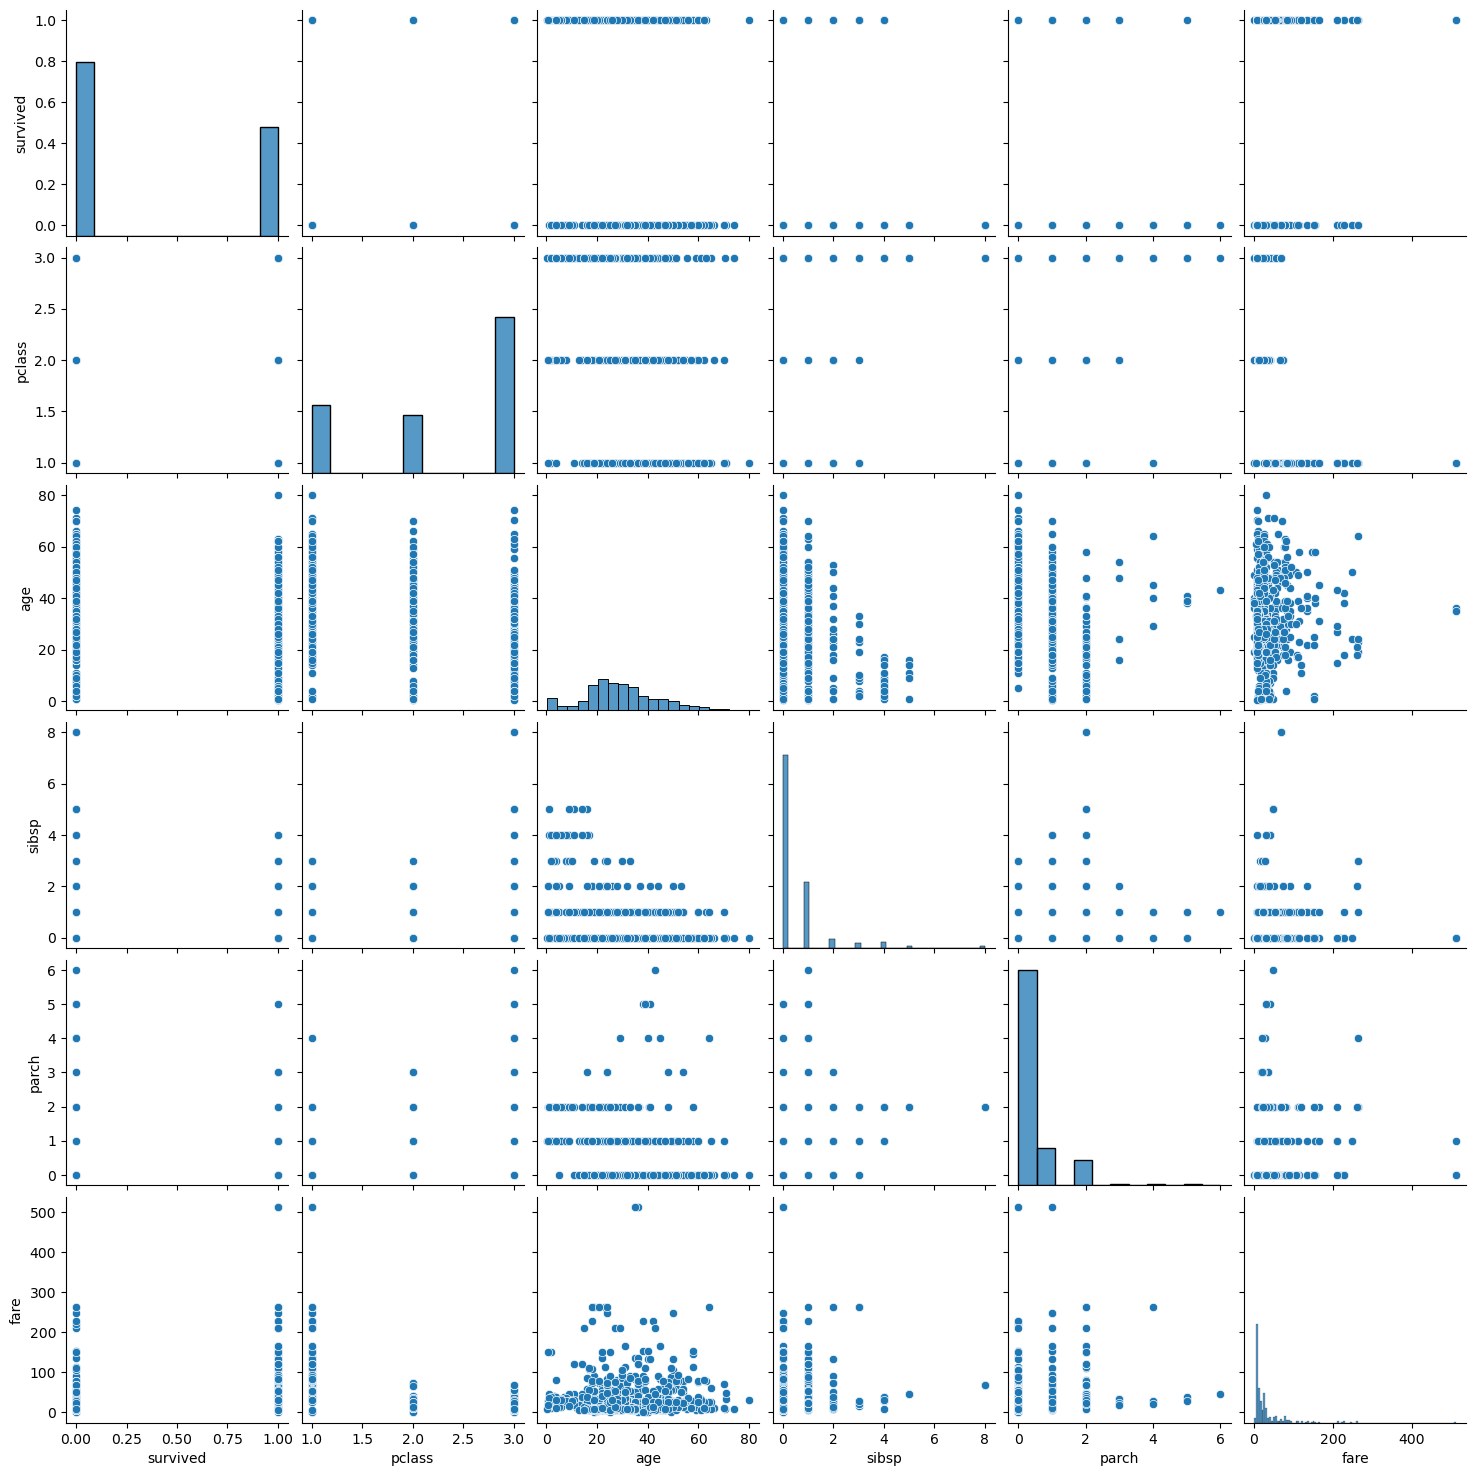

In [15]:
sns.pairplot(titanic[numerical])
plt.show()

In [16]:
correlation_matrix = titanic[numerical].corr()
print(correlation_matrix)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


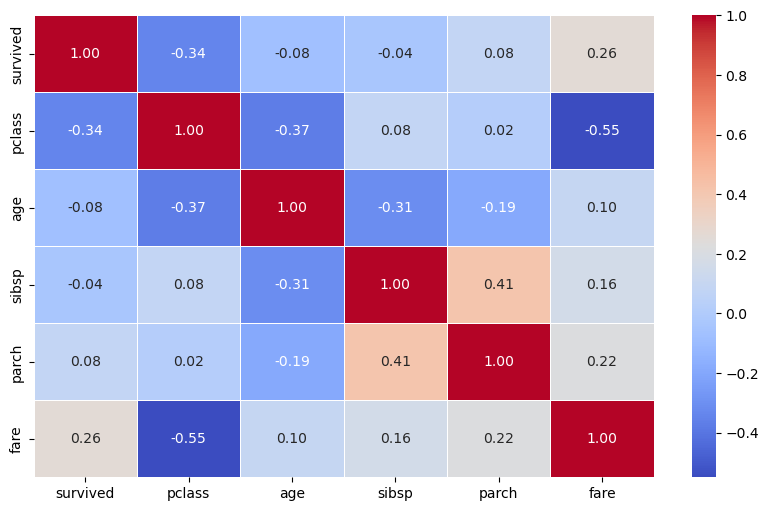

In [17]:
correlation_matrix = titanic[numerical].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

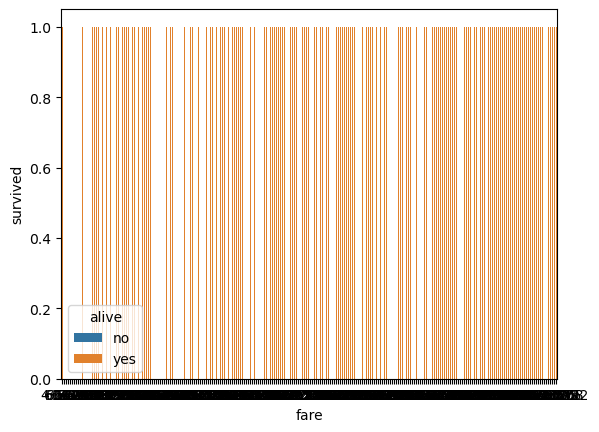

In [19]:
sns.barplot(x='fare', y='survived', hue='alive', data=titanic)
plt.show()

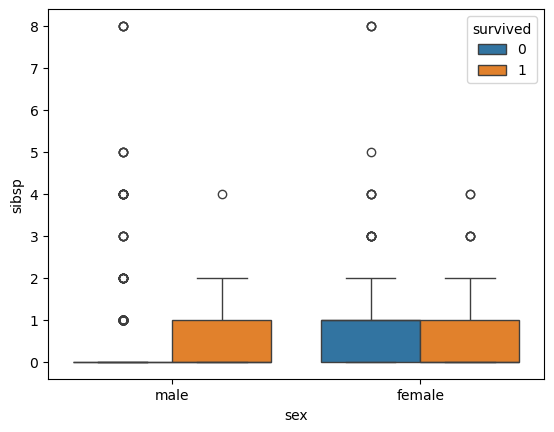

In [20]:
sns.boxplot(x='sex', y='sibsp', hue='survived', data=titanic)
plt.show()